In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

import constants as C

In [2]:
hunters = pd.read_csv('output_data/hunters.csv')
gatherers = pd.read_csv('output_data/gatherers.csv')

In [3]:
def matrix_plot_ABCD(df, stat, selected = 'A', h_or_g = 'hunters', drop_questions=True):
    df = df[
        [C.TRIAL_ID, C.PARTICIPANT_ID, C.AREA_LABEL_COLUMN, C.AREA_SCREEN_LOCATION, stat]
    ].drop_duplicates().copy()

    if drop_questions:
        df = df[df[C.AREA_LABEL_COLUMN] != 'question']

    matrix = pd.pivot_table(
        data=df,
        index=C.AREA_LABEL_COLUMN,
        columns=C.AREA_SCREEN_LOCATION,
        values=stat,
        aggfunc='mean'
    )

    # Enforce consistent ordering, but only include rows that exist
    row_order = [lbl for lbl in C.ANSWER_LABEL_CHOICES if lbl in matrix.index]
    col_order = [loc for loc in C.AREA_LABEL_CHOICES if loc in matrix.columns]

    matrix = matrix.reindex(index=row_order, columns=col_order)

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        matrix,
        annot=True,
        cmap='Blues',
        fmt=".2f",
        cbar_kws={'label': stat}
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    plt.title(f"{stat} of those who chose {selected}")
    plt.xlabel('area_screen_loc')
    plt.ylabel("area_label")
    plt.tight_layout()
    os.makedirs(f"plots/basic_stats_heatmaps/{stat}", exist_ok=True)
    plt.savefig(f"plots/basic_stats_heatmaps/{stat}/{h_or_g} - {selected} selected - (questions removed - {drop_questions}).png")

    plt.show()

In [4]:
def label_vs_loc_mat(metric, dfh, dfg, drop_questions=False):
    print(f"HUNTERS (drop_questions={drop_questions})")
    for ans in ['A', 'B', 'C', 'D']:
        subset_h = dfh[dfh[C.SELECTED_ANSWER_LABEL_COLUMN] == ans]
        matrix_plot_ABCD(
            subset_h,
            metric,
            selected=ans,
            h_or_g='hunters',
            drop_questions=drop_questions,
        )

    print(f"GATHERERS (drop_questions={drop_questions})")
    for ans in ['A', 'B', 'C', 'D']:
        subset_g = dfg[dfg[C.SELECTED_ANSWER_LABEL_COLUMN] == ans]
        matrix_plot_ABCD(
            subset_g,
            metric,
            selected=ans,
            h_or_g='gatherers',
            drop_questions=drop_questions,
        )



=== mean_dwell_time: INCLUDING question area ===
HUNTERS (drop_questions=False)


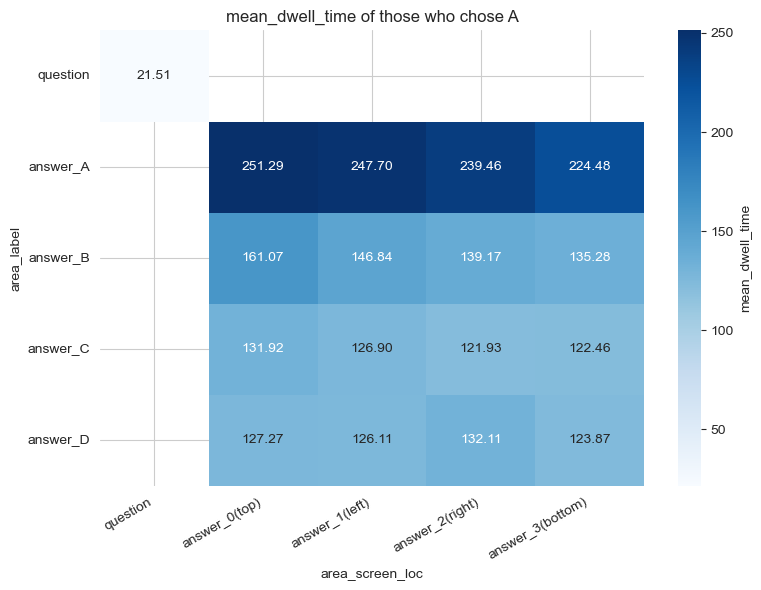

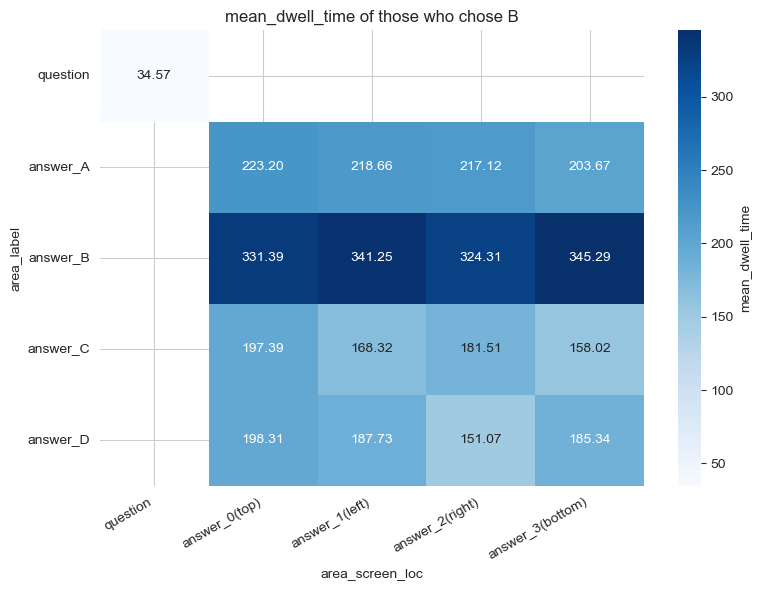

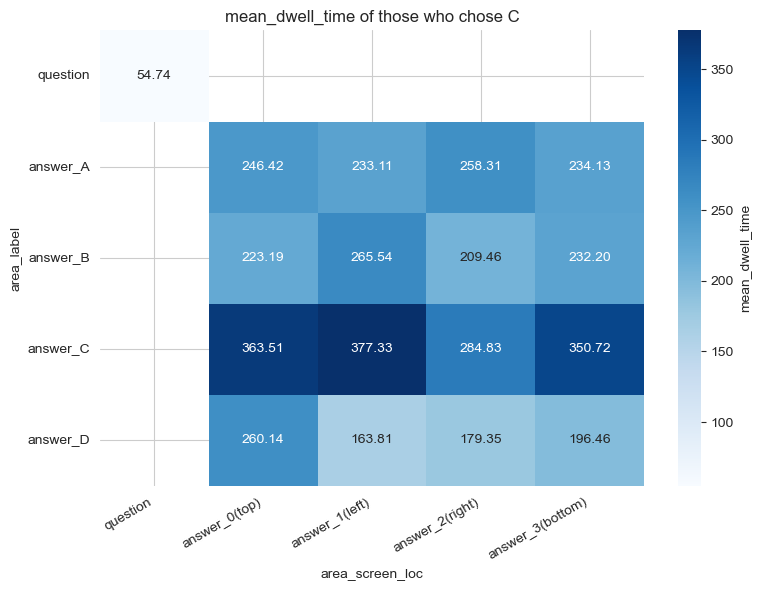

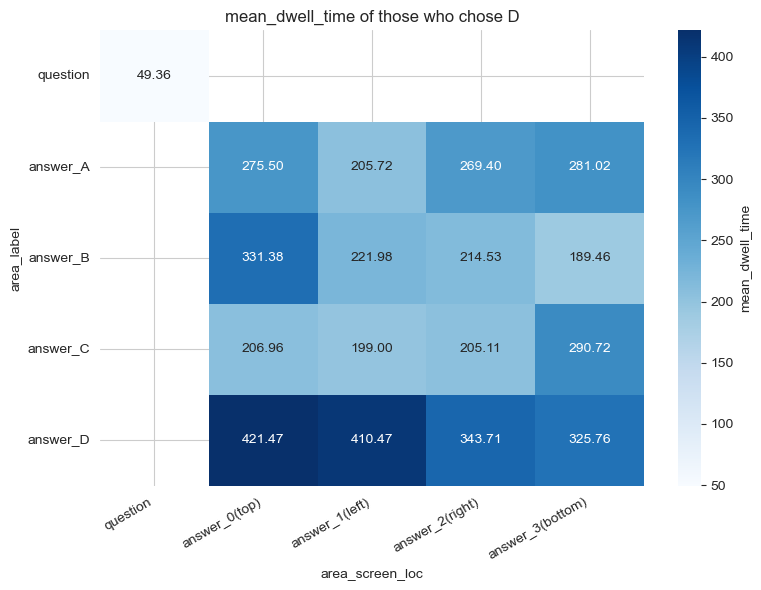

GATHERERS (drop_questions=False)


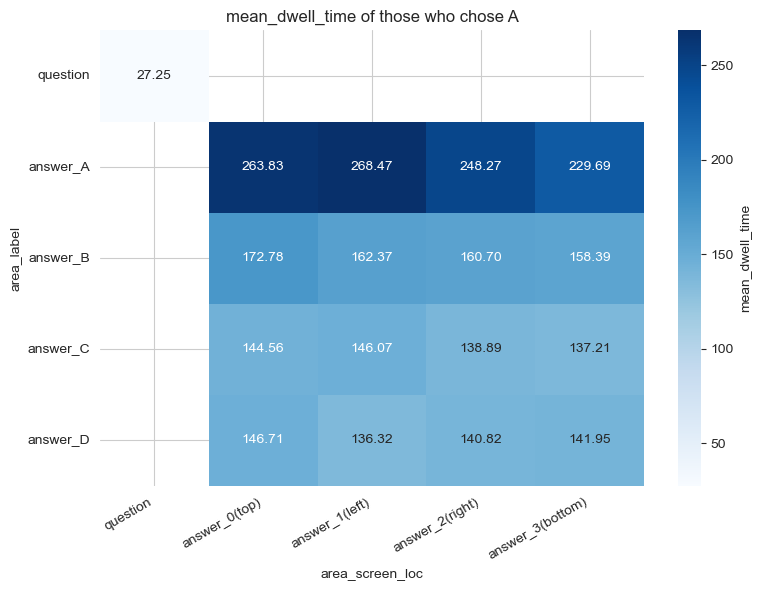

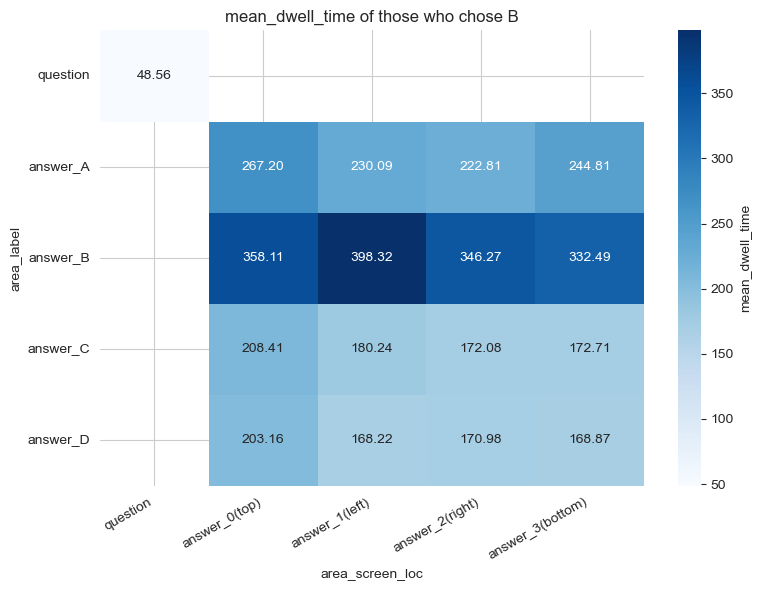

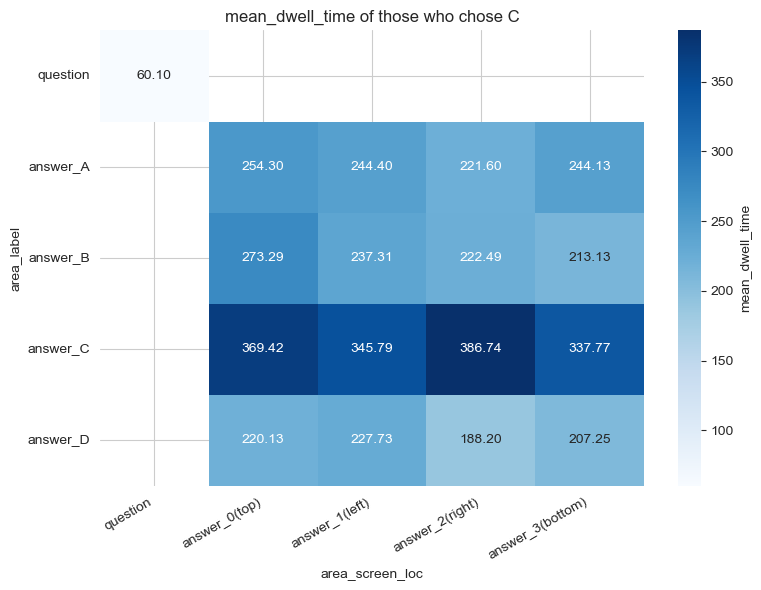

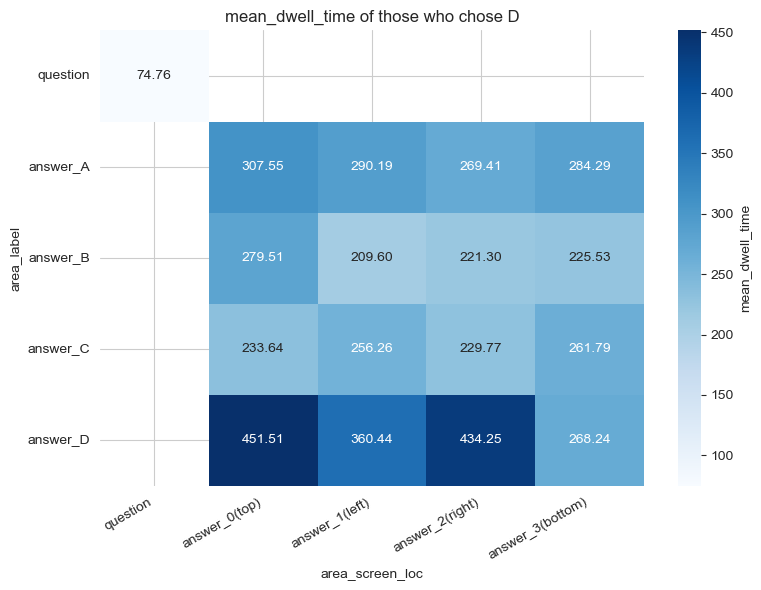


=== mean_dwell_time: EXCLUDING question area ===
HUNTERS (drop_questions=True)


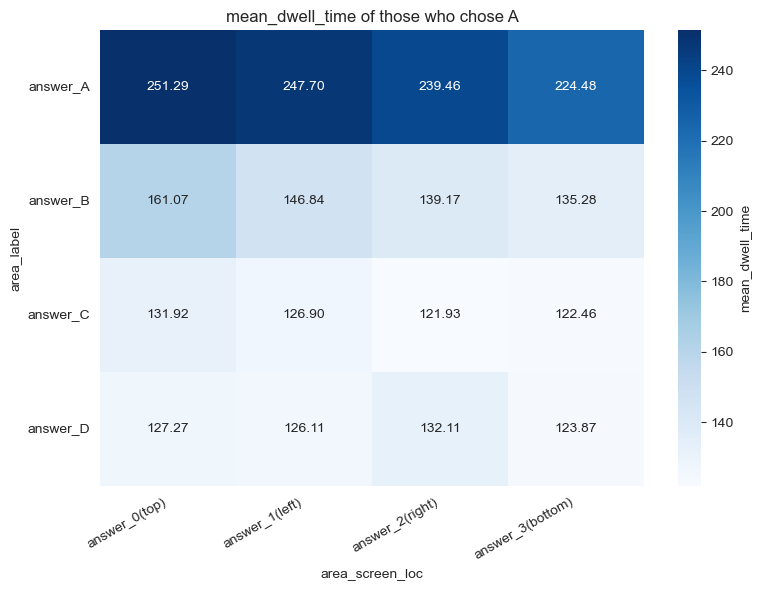

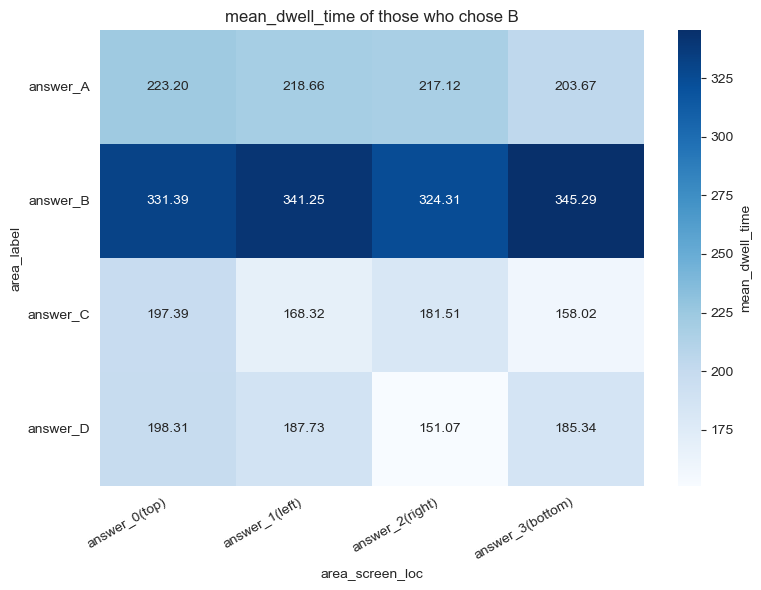

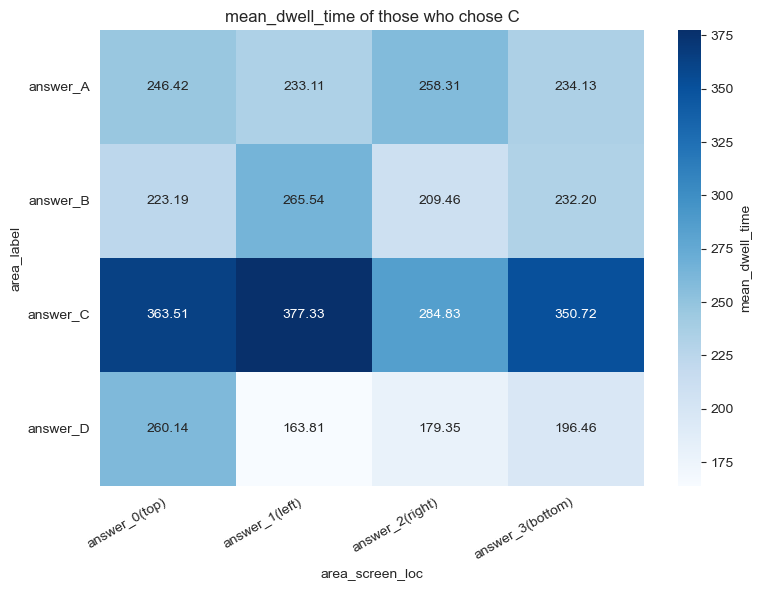

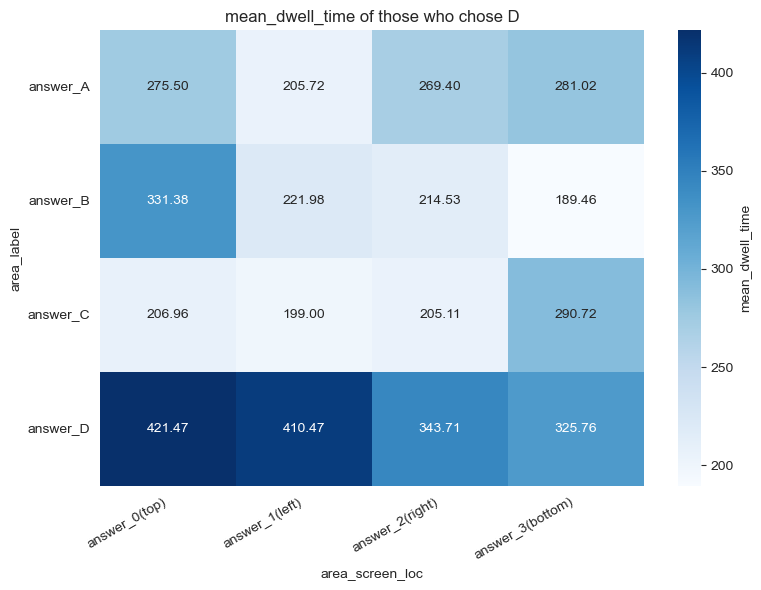

GATHERERS (drop_questions=True)


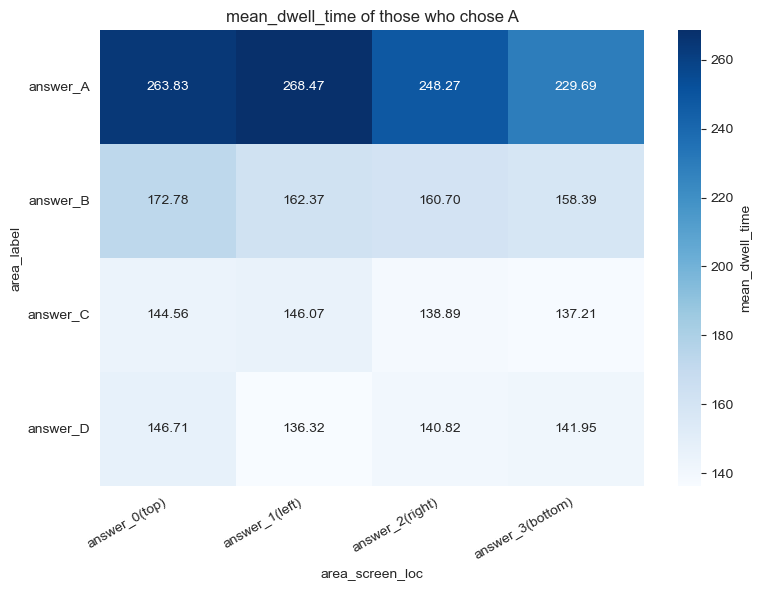

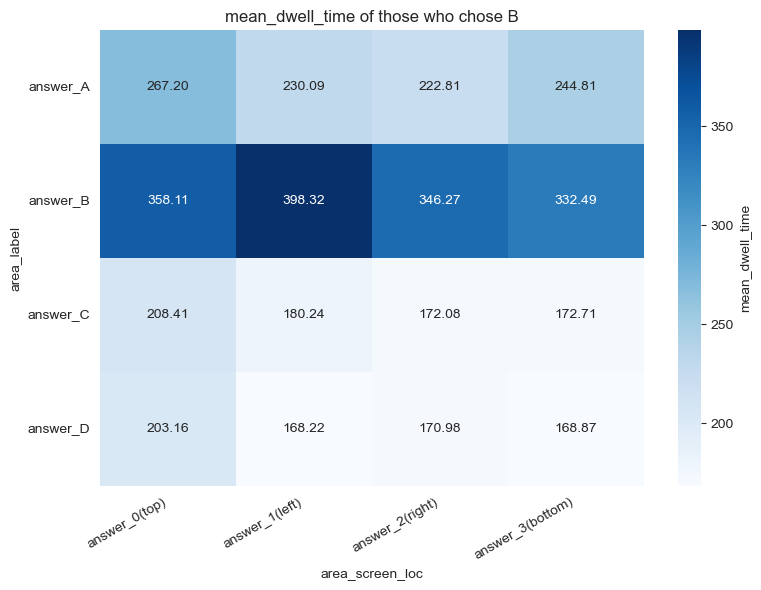

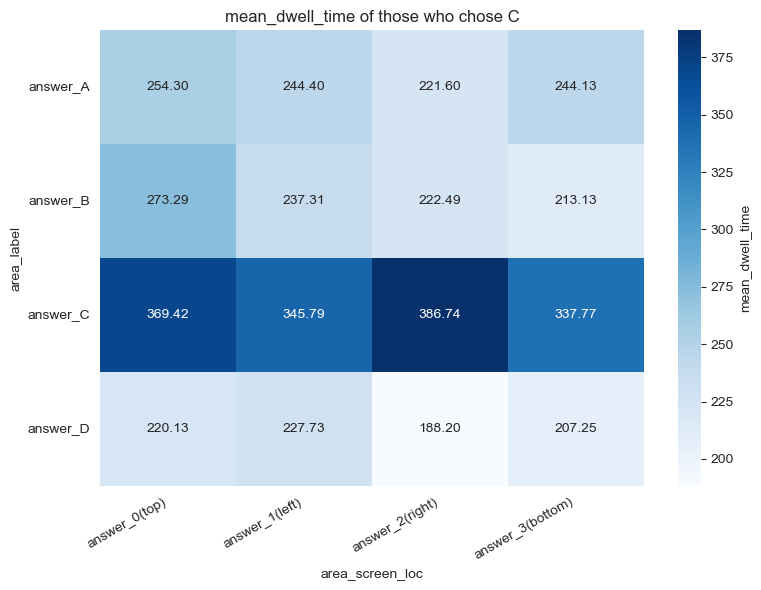

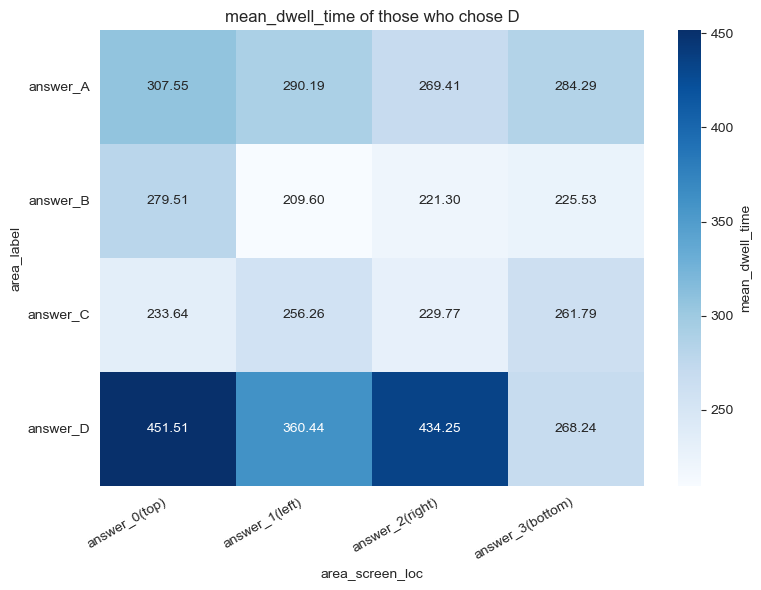


=== mean_fixations_count: INCLUDING question area ===
HUNTERS (drop_questions=False)


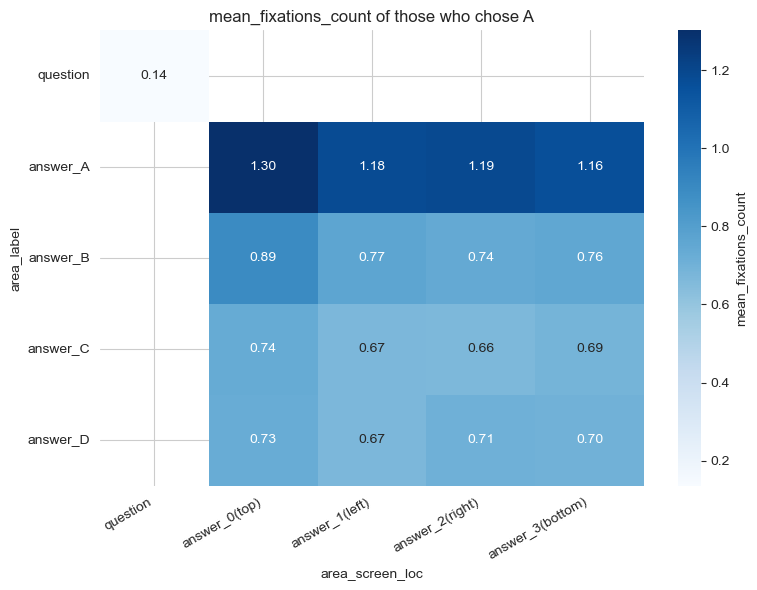

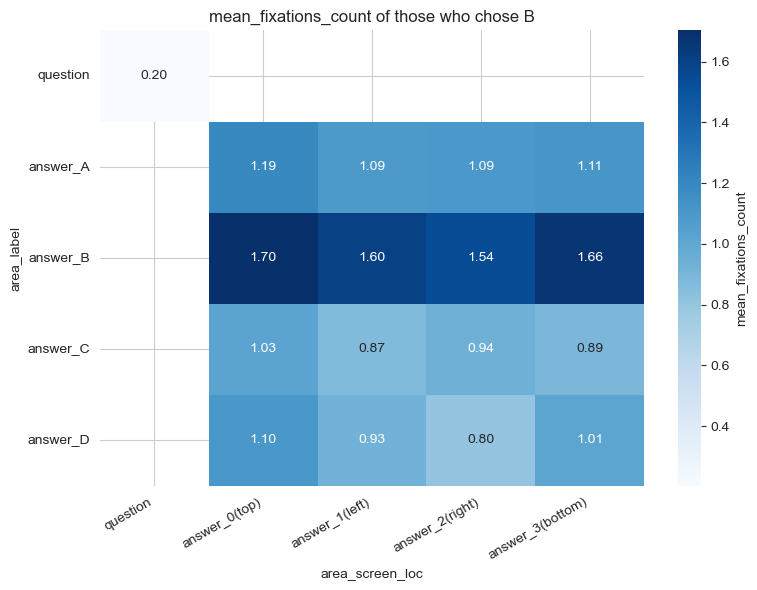

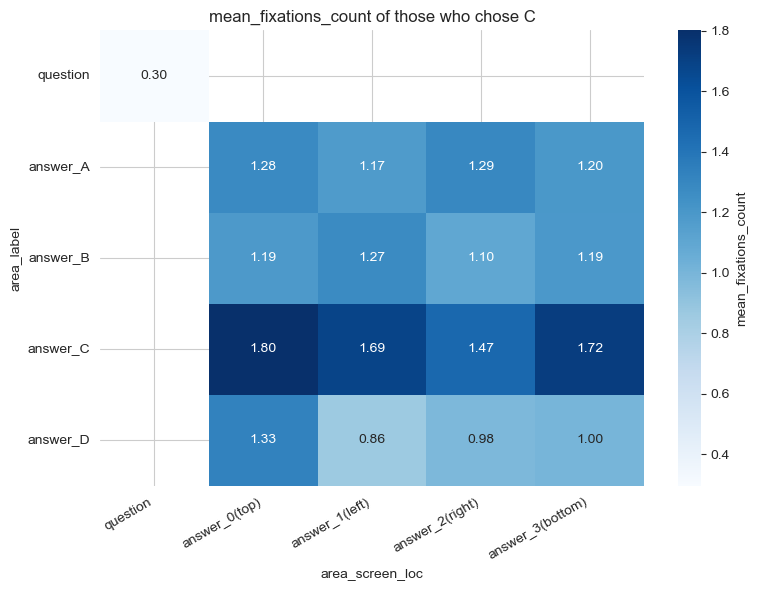

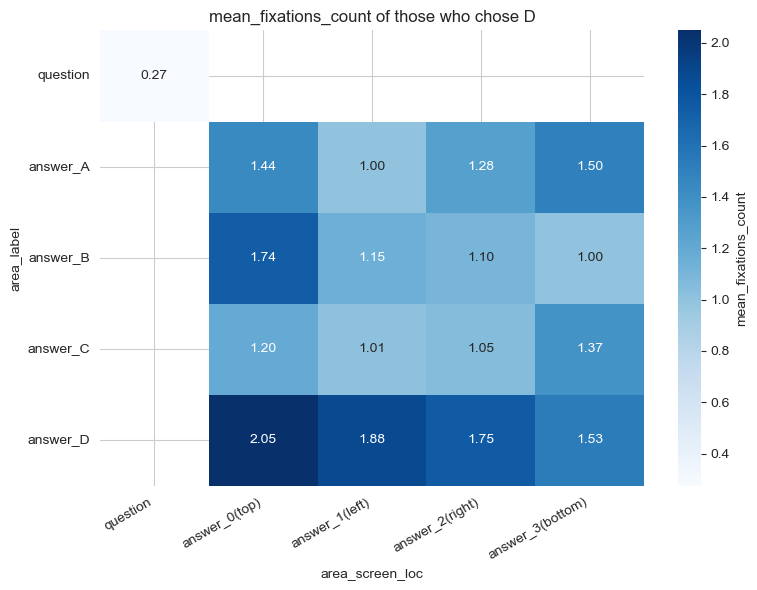

GATHERERS (drop_questions=False)


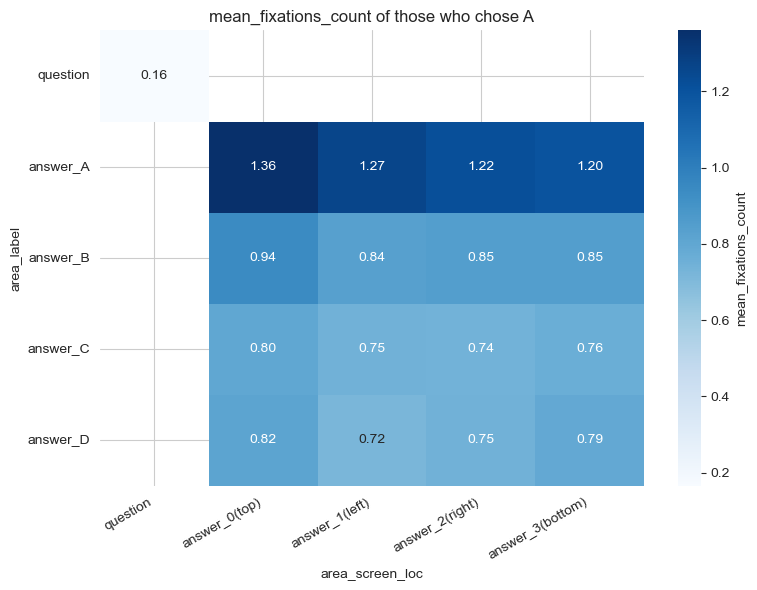

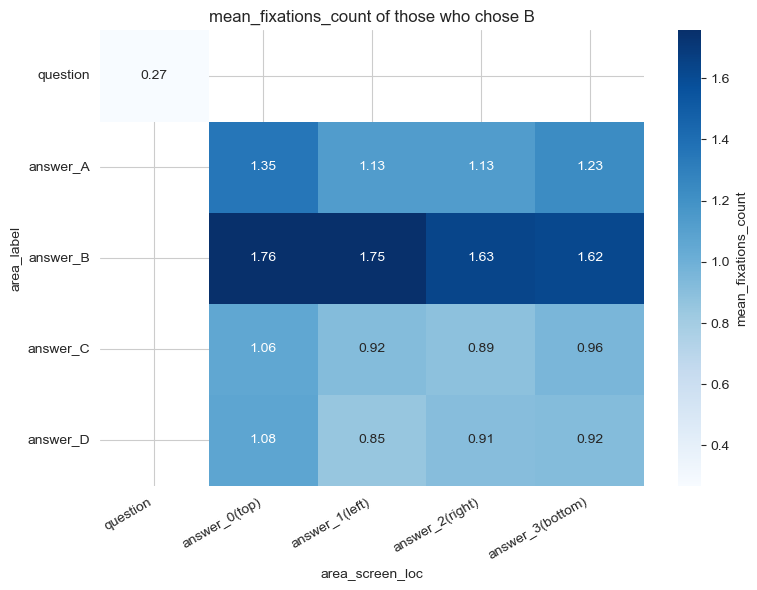

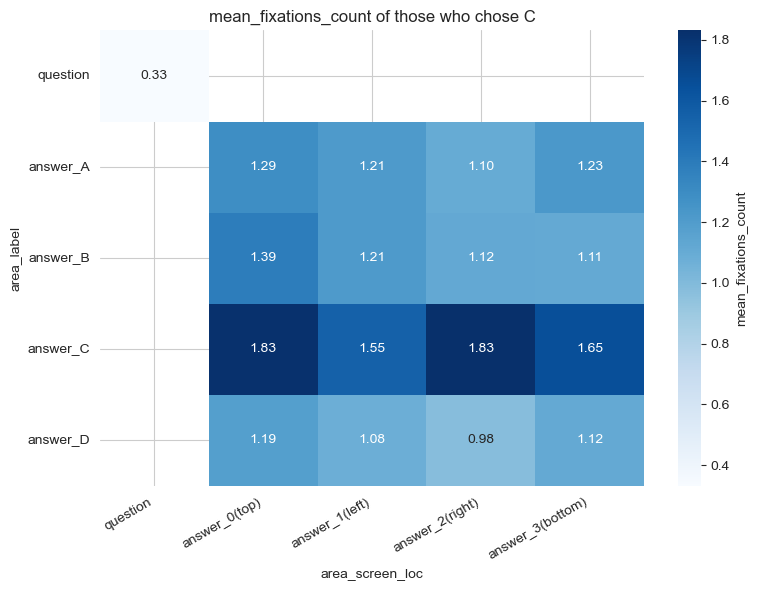

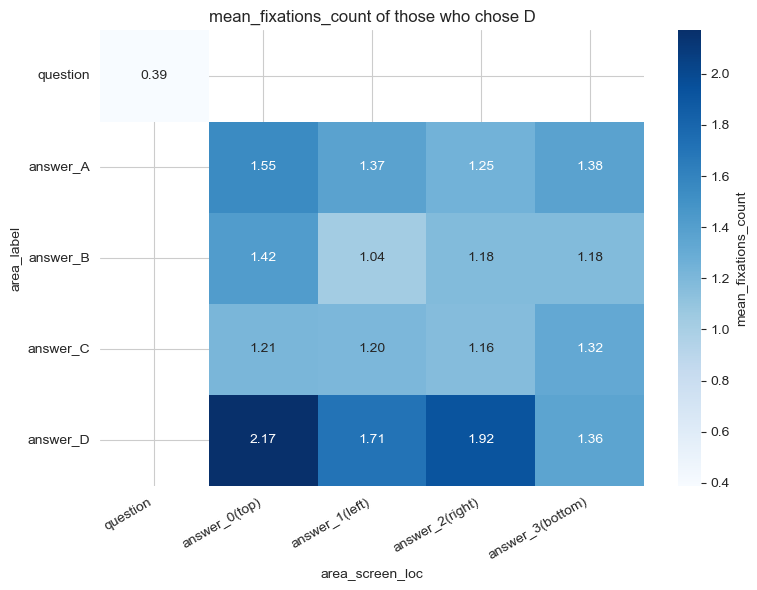


=== mean_fixations_count: EXCLUDING question area ===
HUNTERS (drop_questions=True)


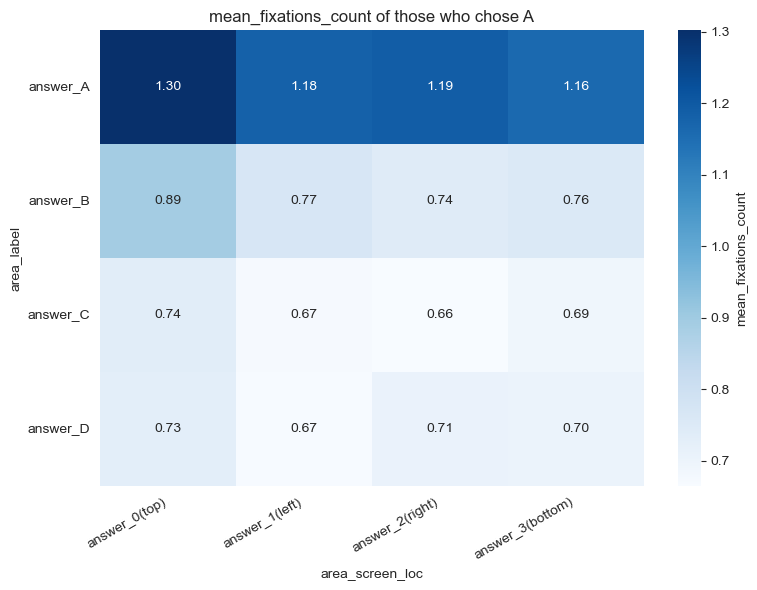

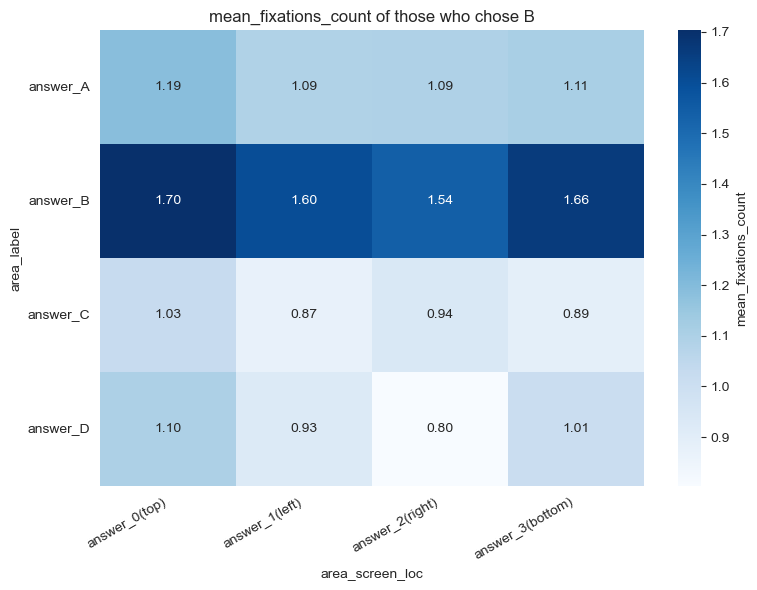

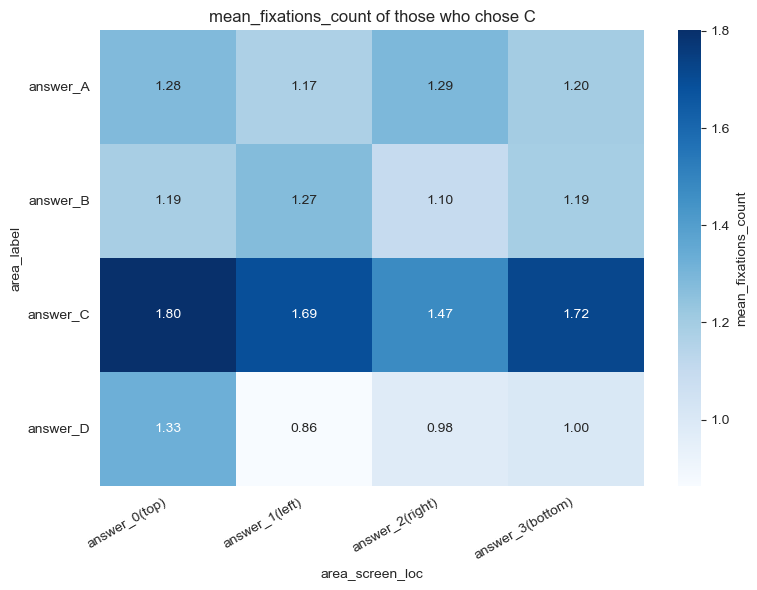

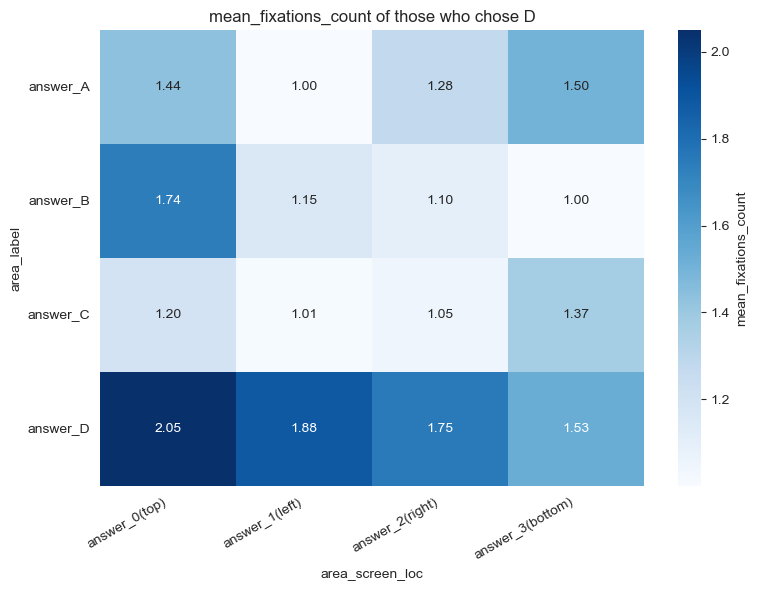

GATHERERS (drop_questions=True)


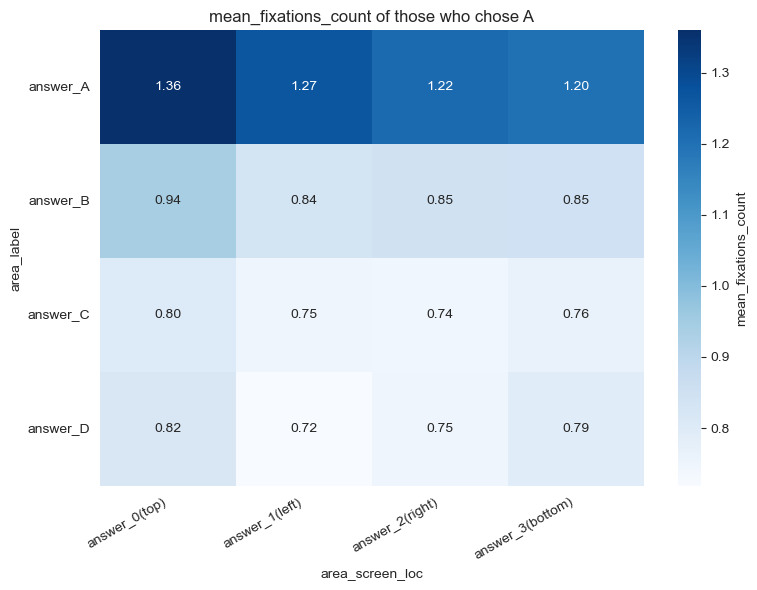

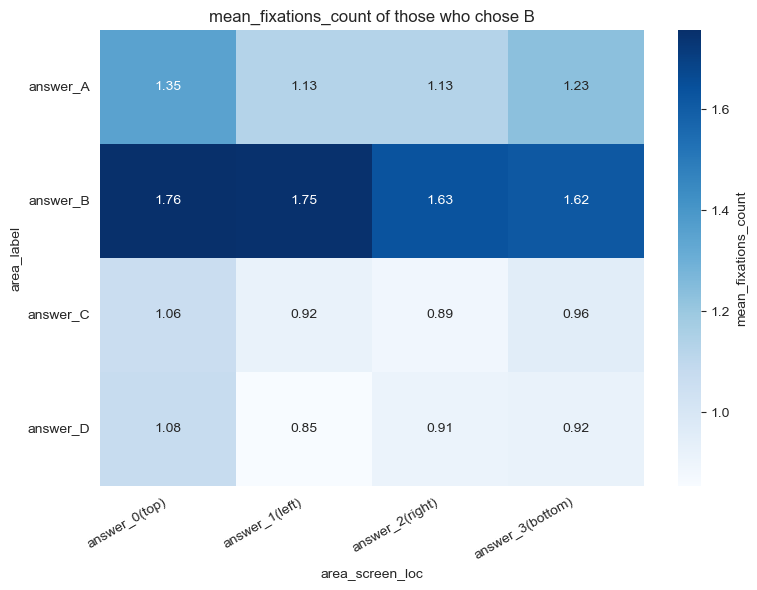

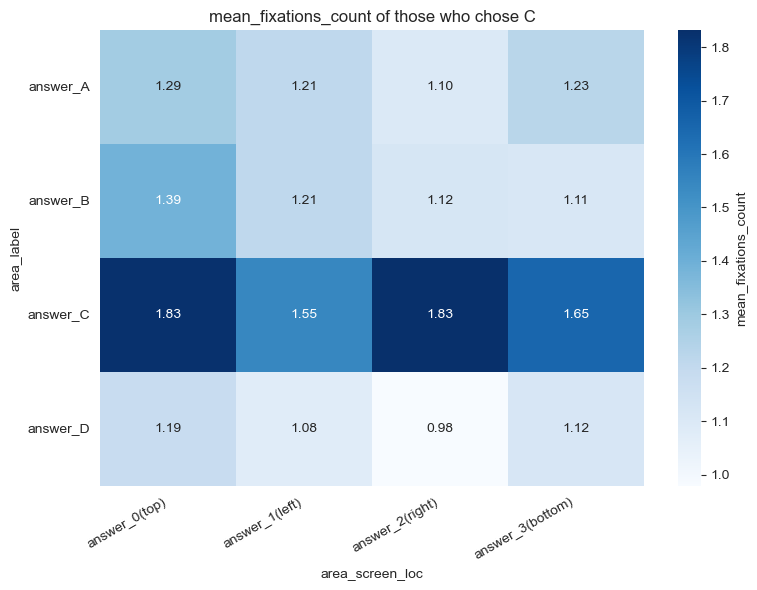

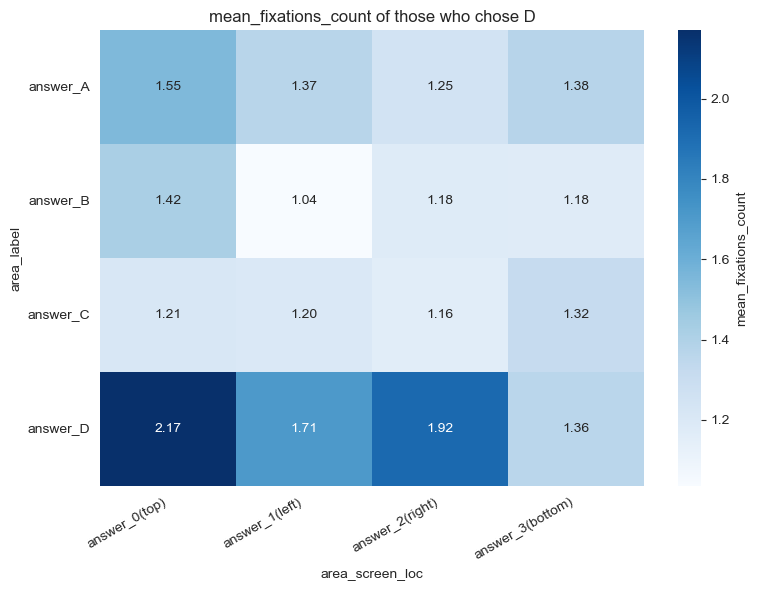


=== mean_first_fixation_duration: INCLUDING question area ===
HUNTERS (drop_questions=False)


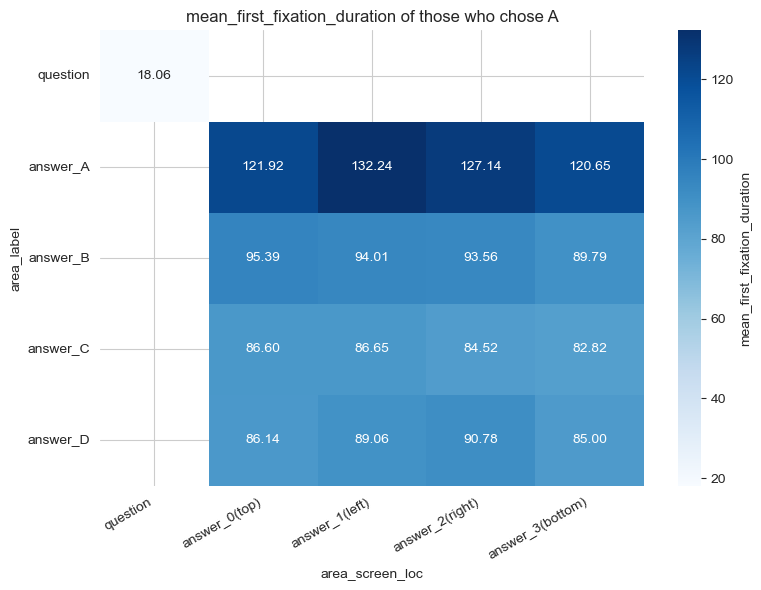

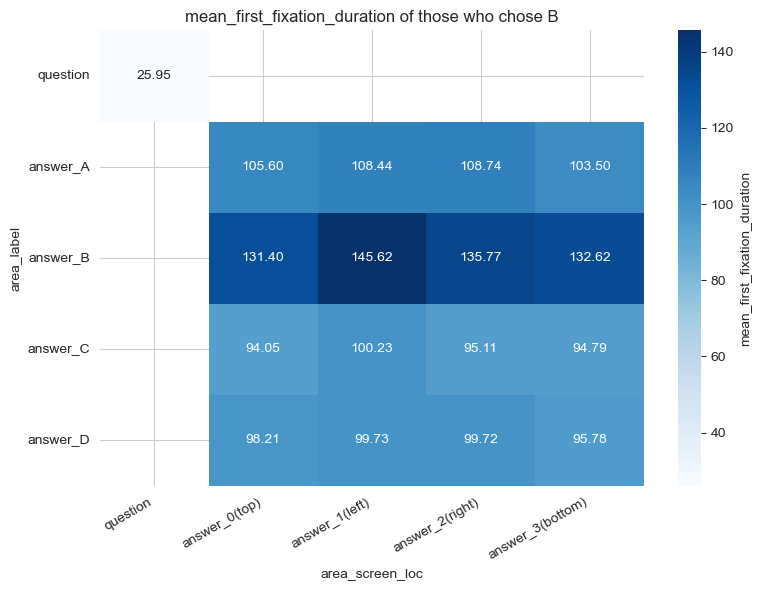

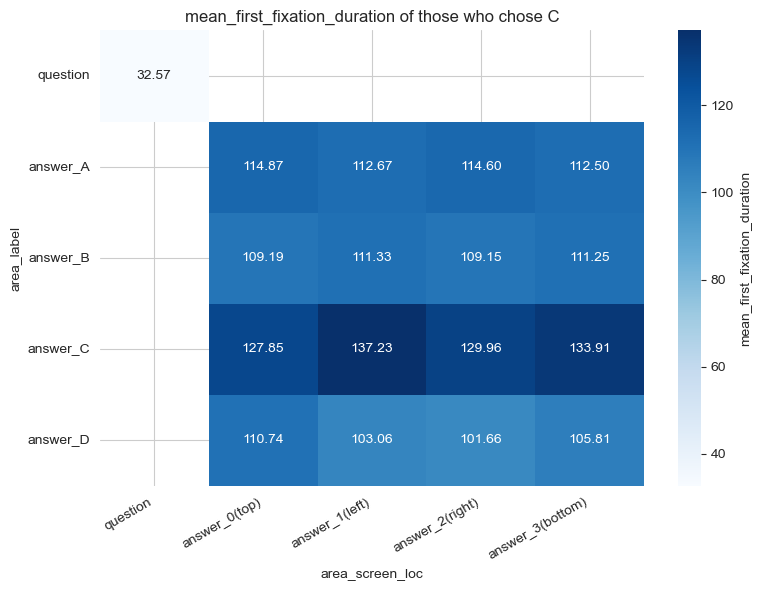

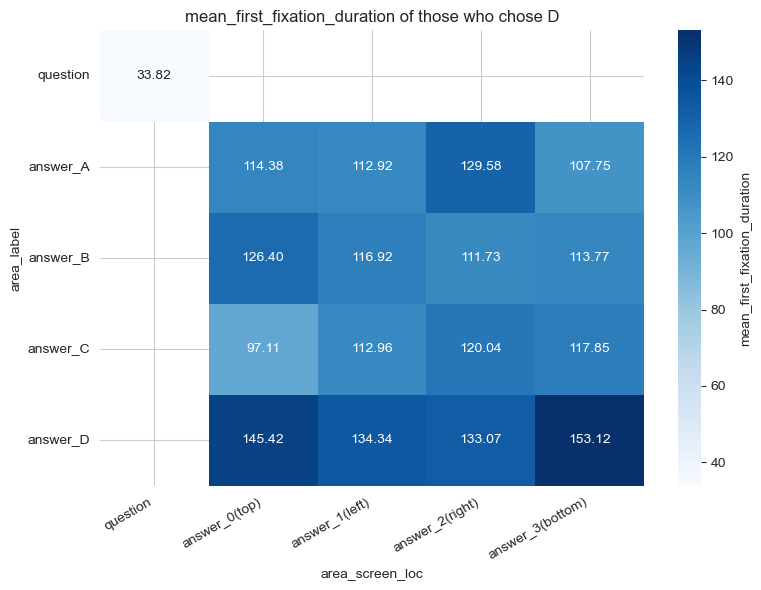

GATHERERS (drop_questions=False)


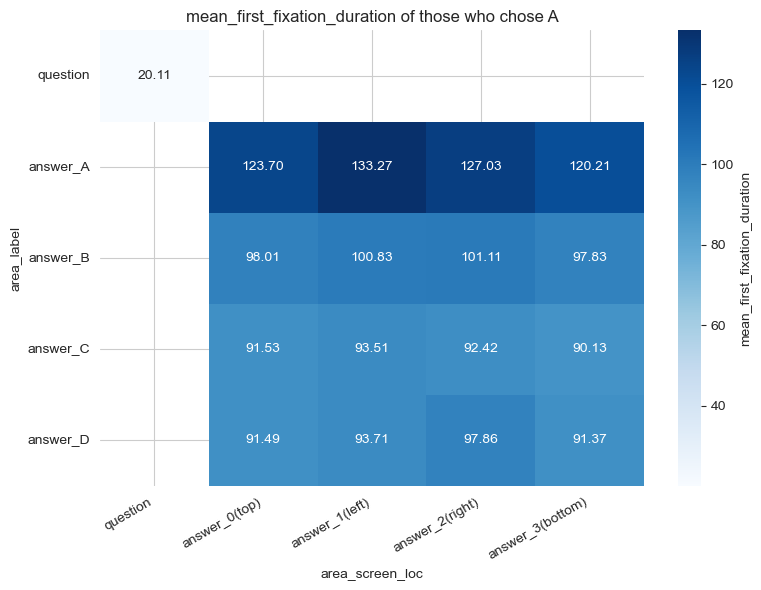

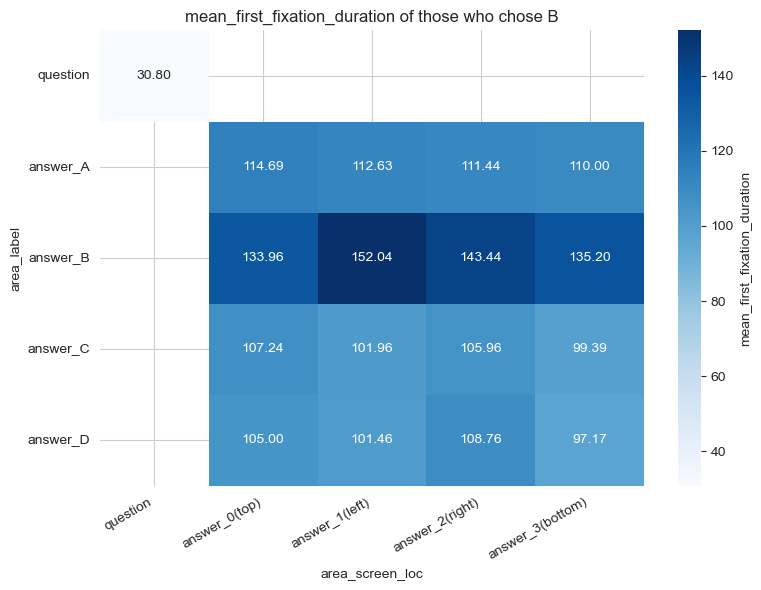

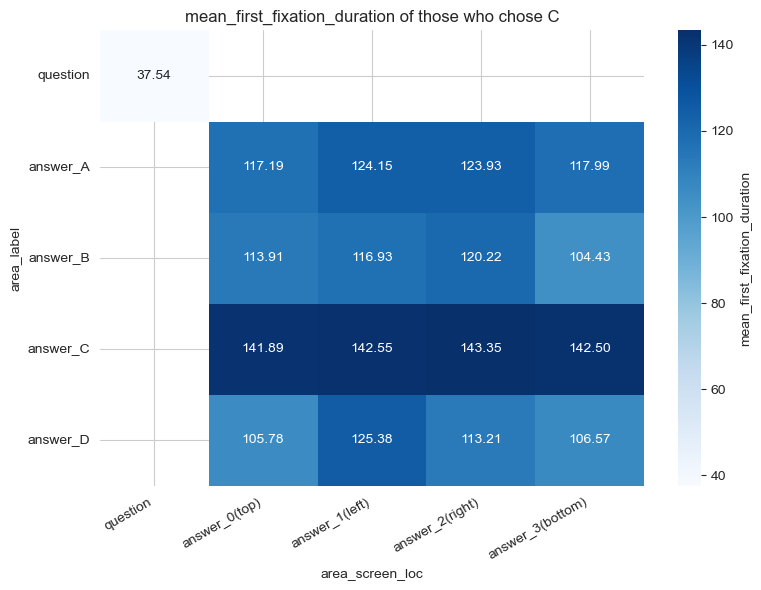

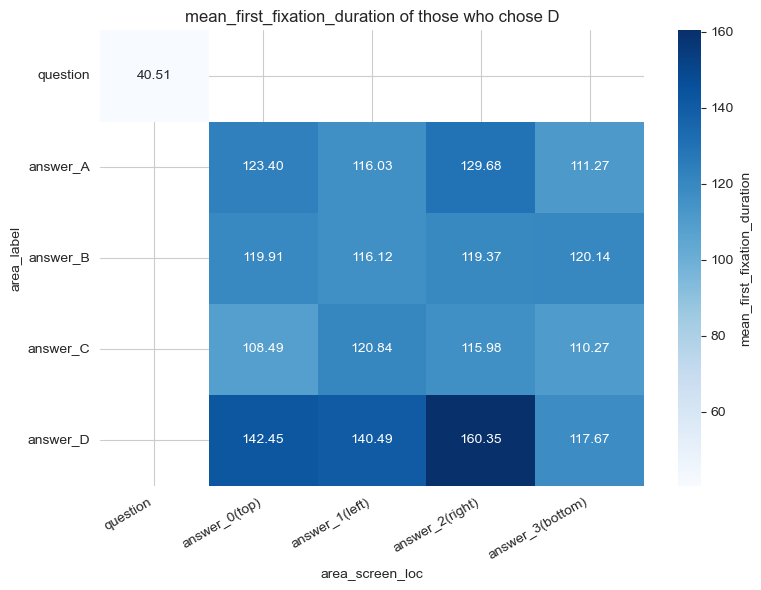


=== mean_first_fixation_duration: EXCLUDING question area ===
HUNTERS (drop_questions=True)


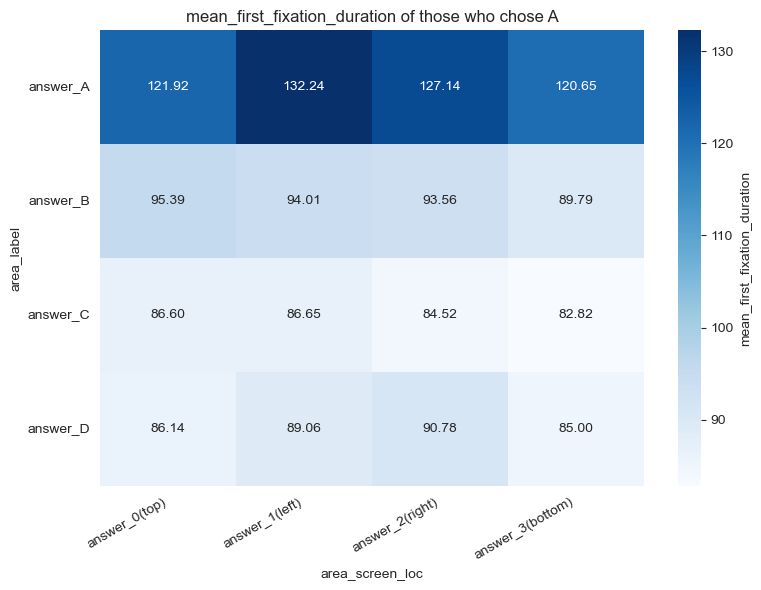

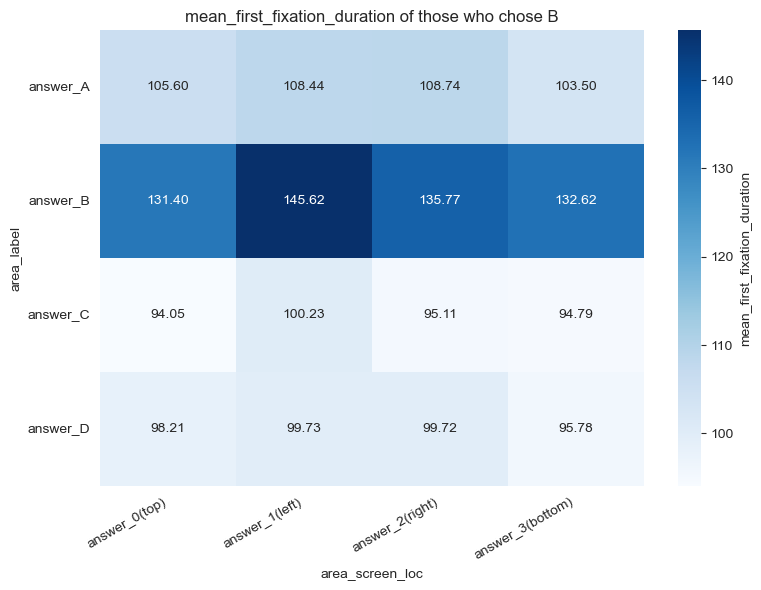

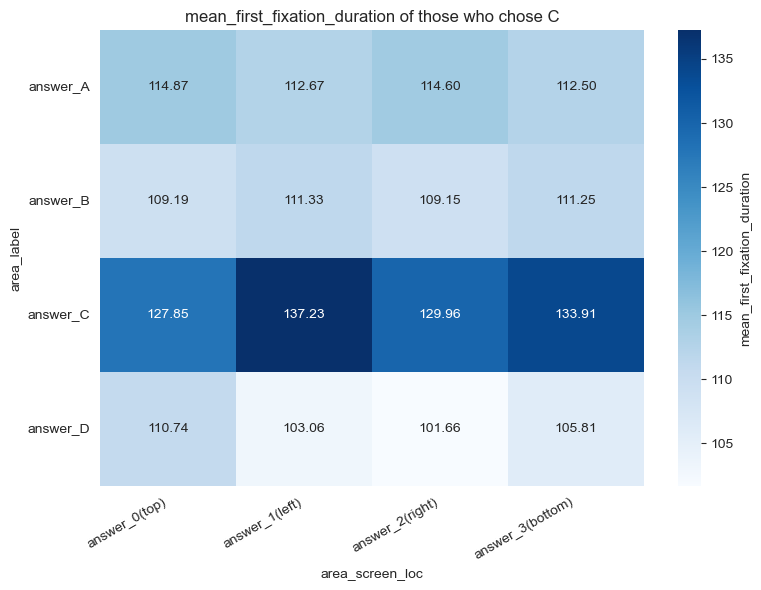

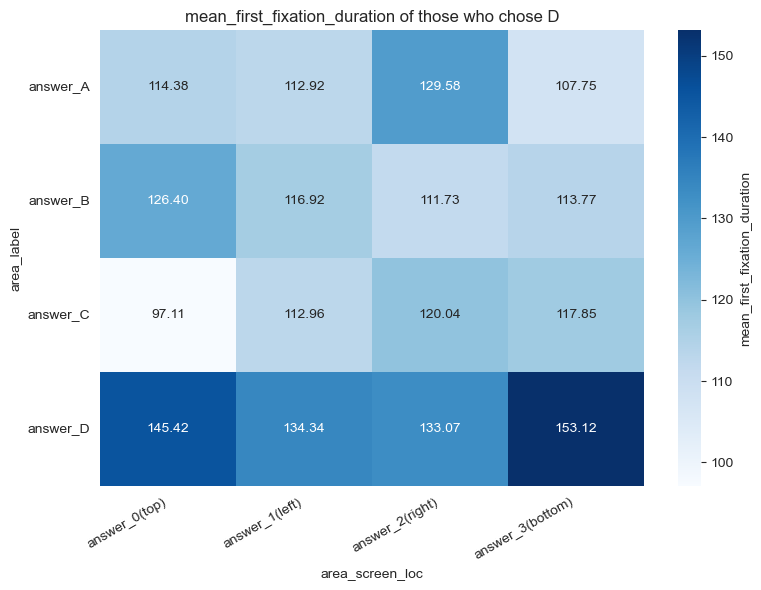

GATHERERS (drop_questions=True)


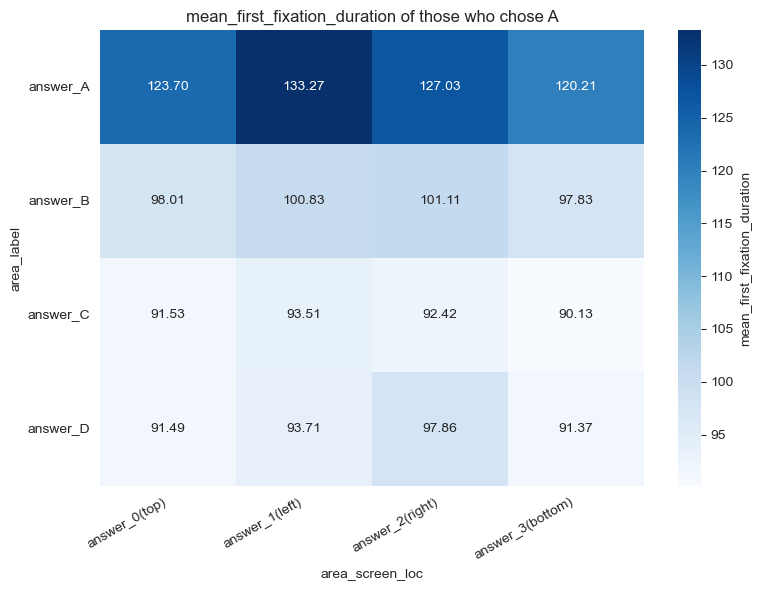

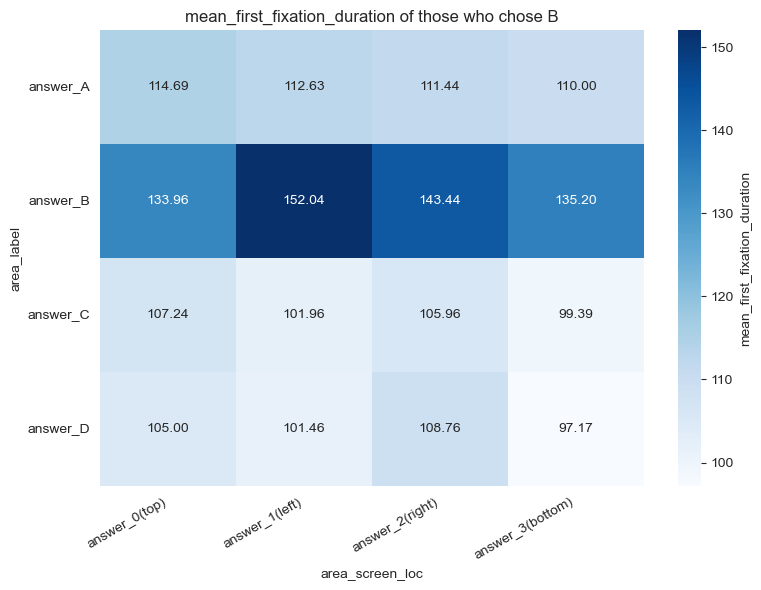

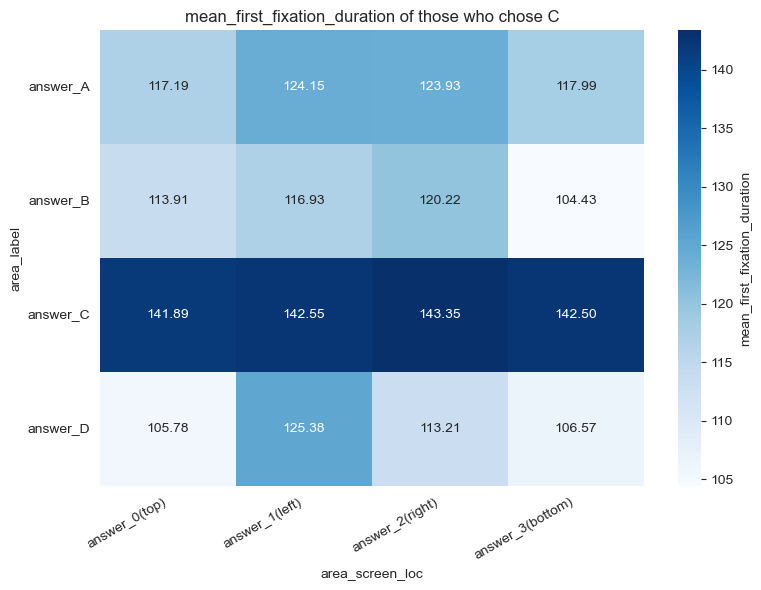

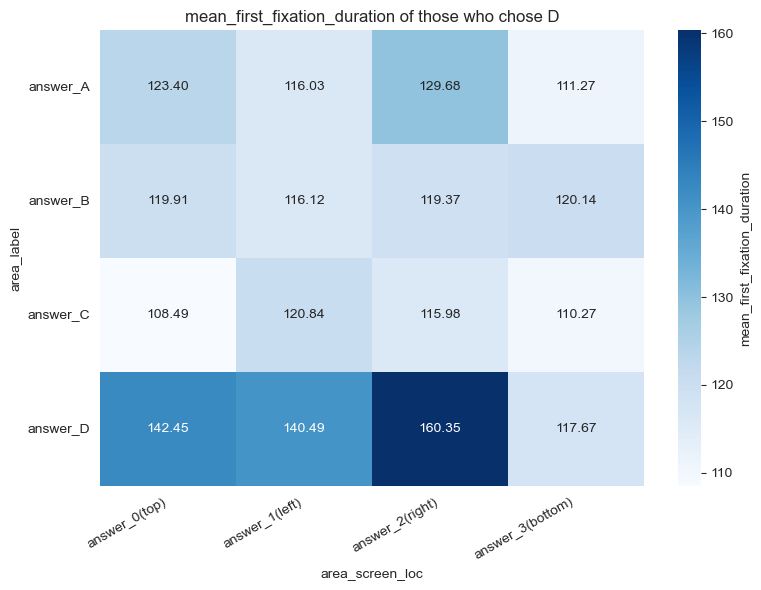


=== skip_rate: INCLUDING question area ===
HUNTERS (drop_questions=False)


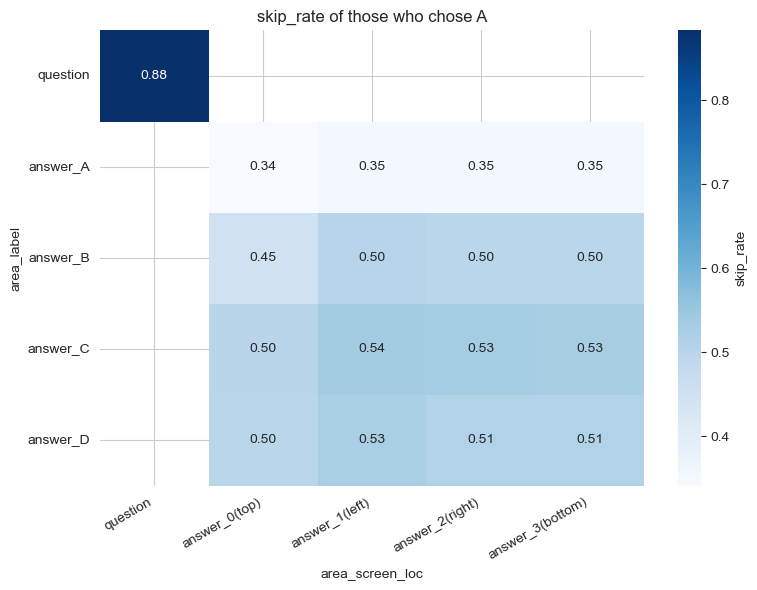

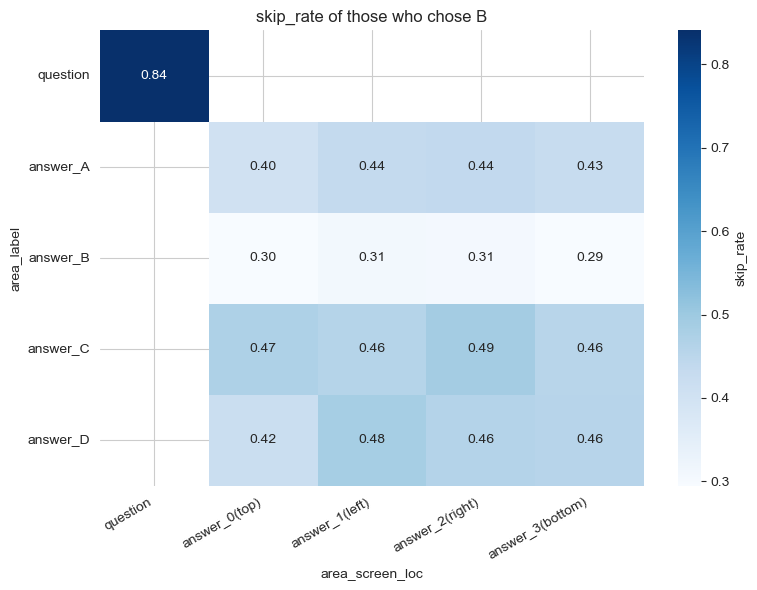

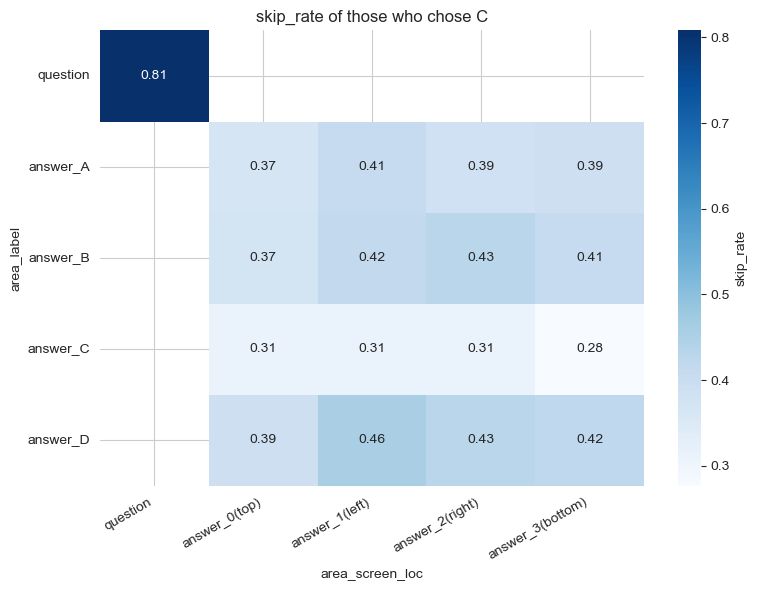

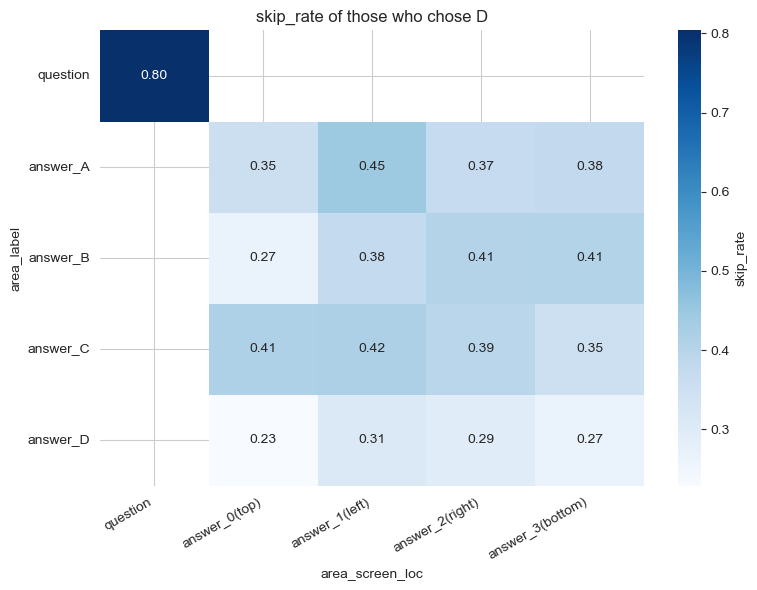

GATHERERS (drop_questions=False)


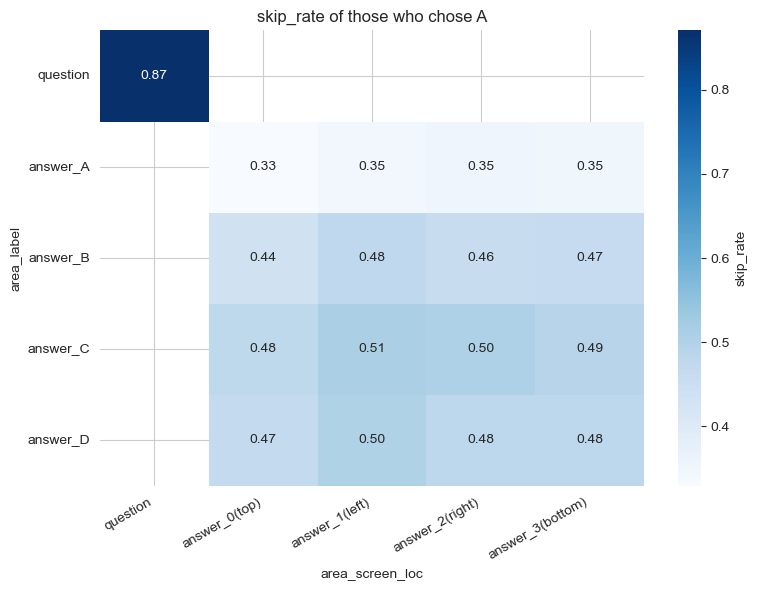

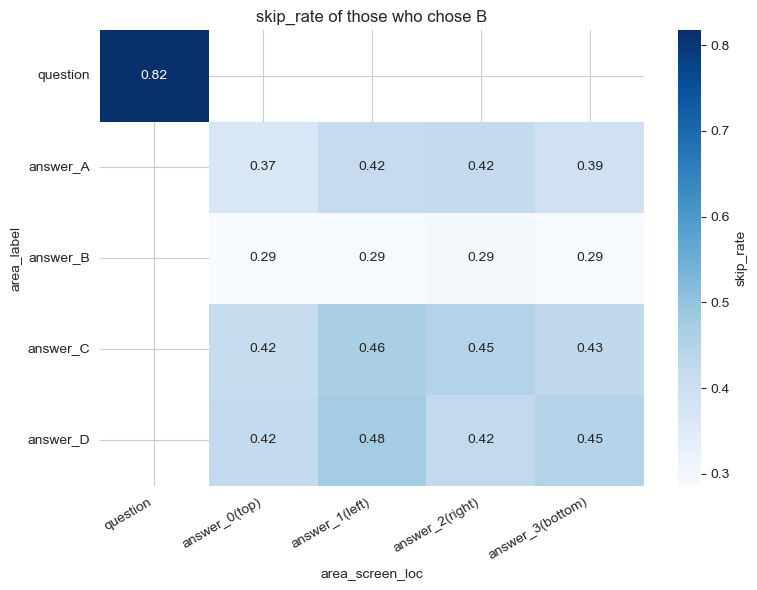

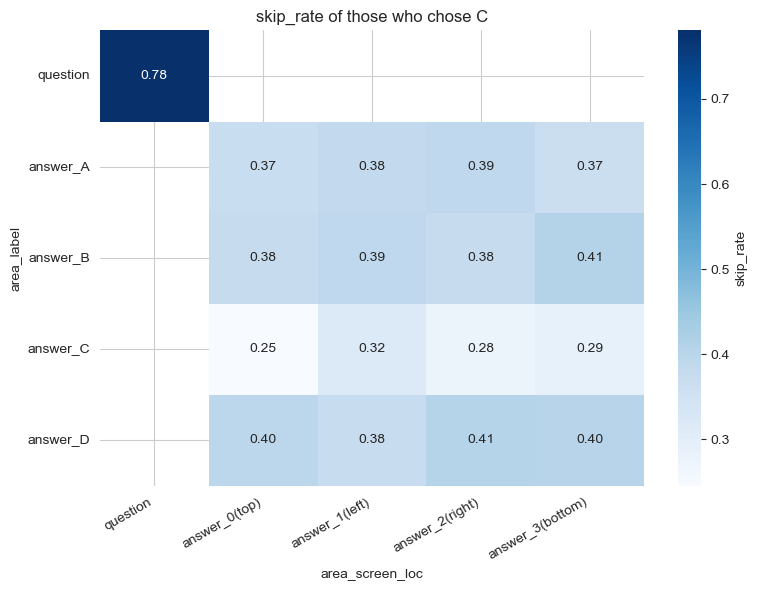

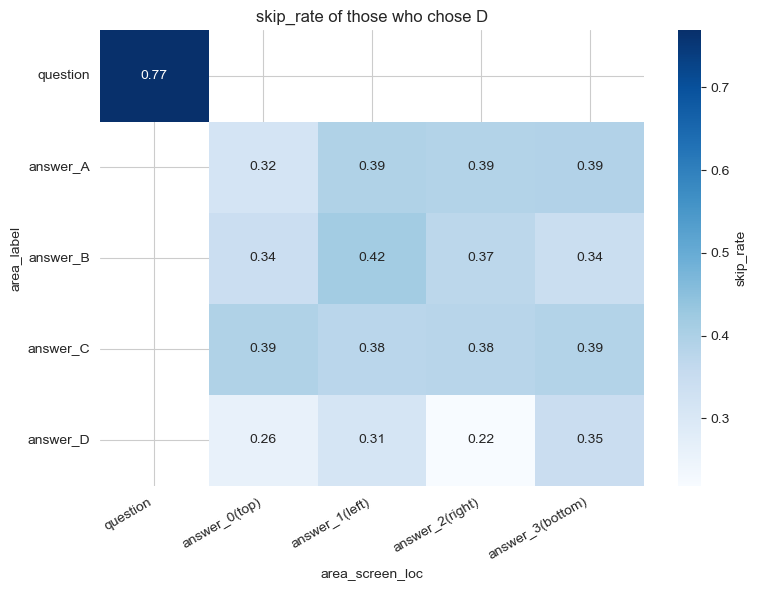


=== skip_rate: EXCLUDING question area ===
HUNTERS (drop_questions=True)


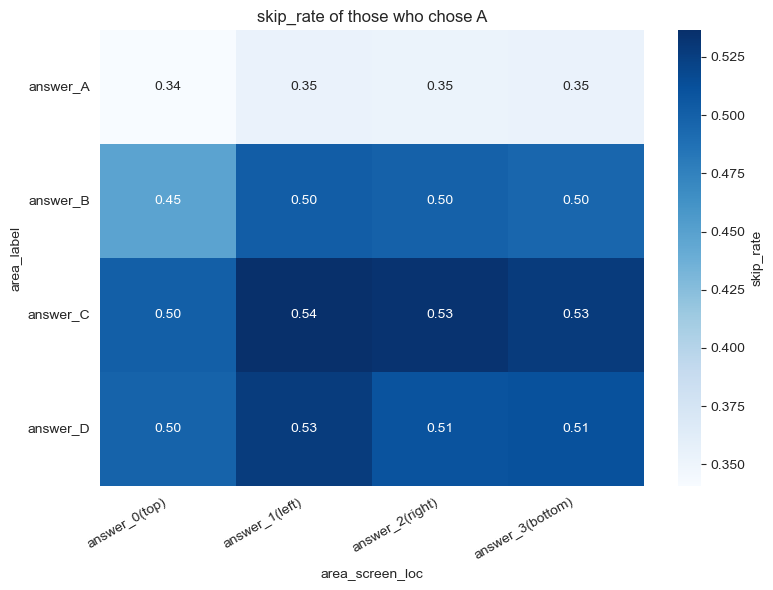

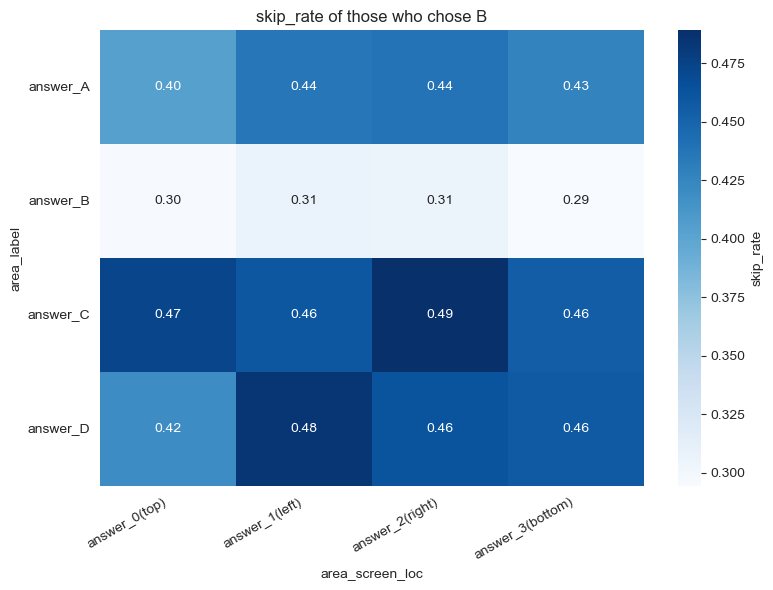

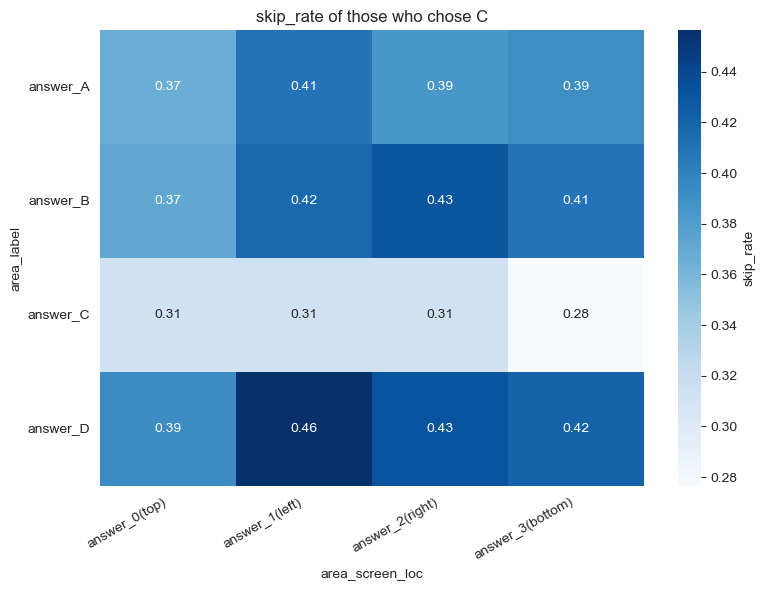

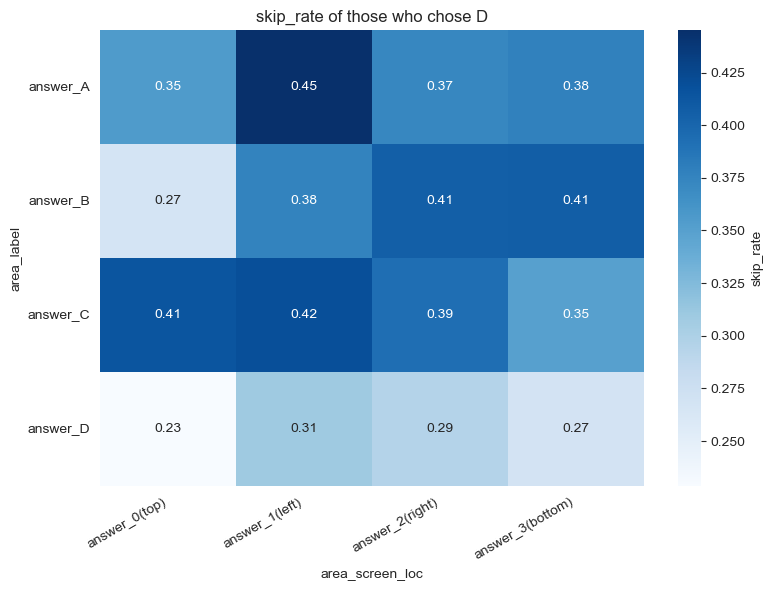

GATHERERS (drop_questions=True)


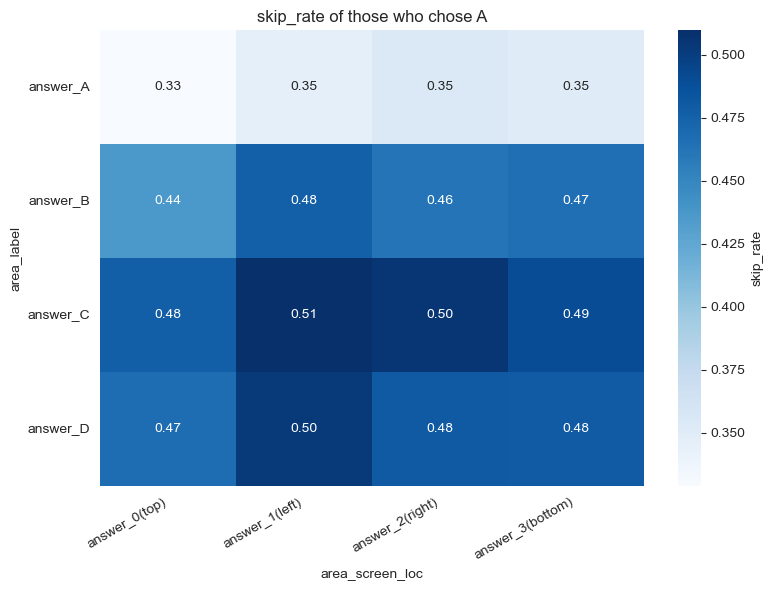

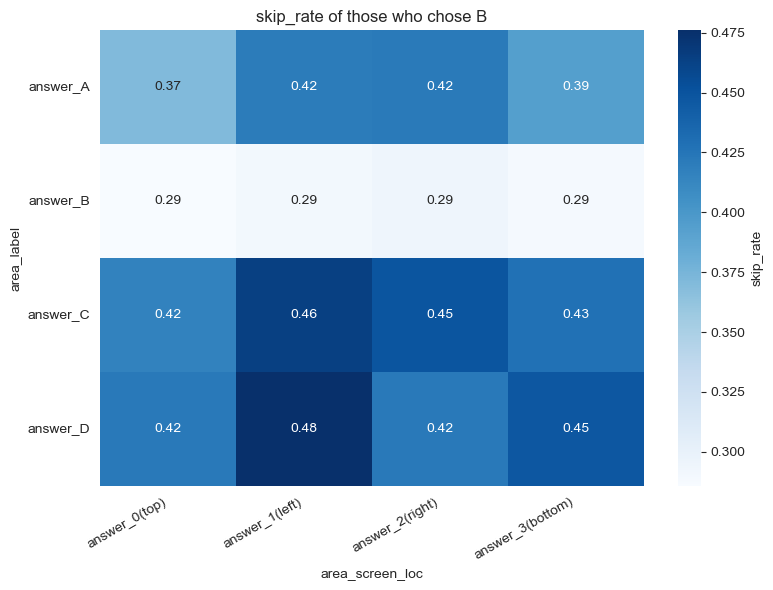

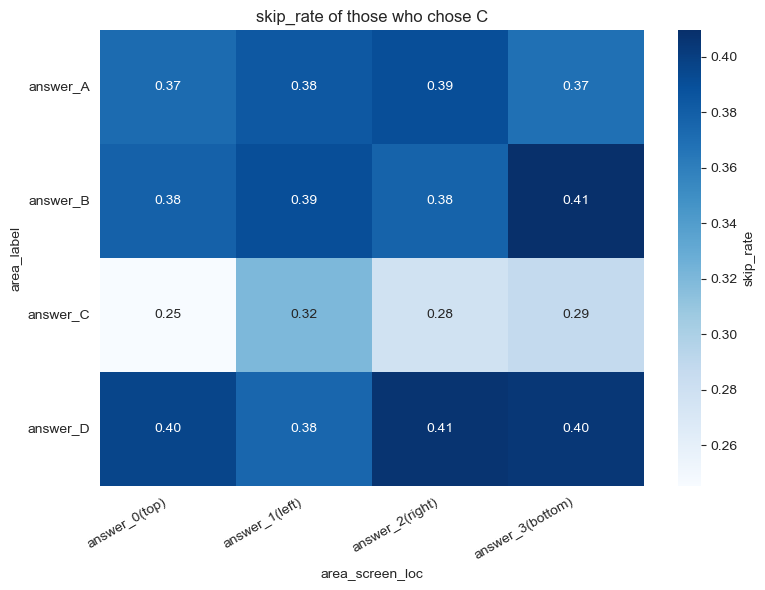

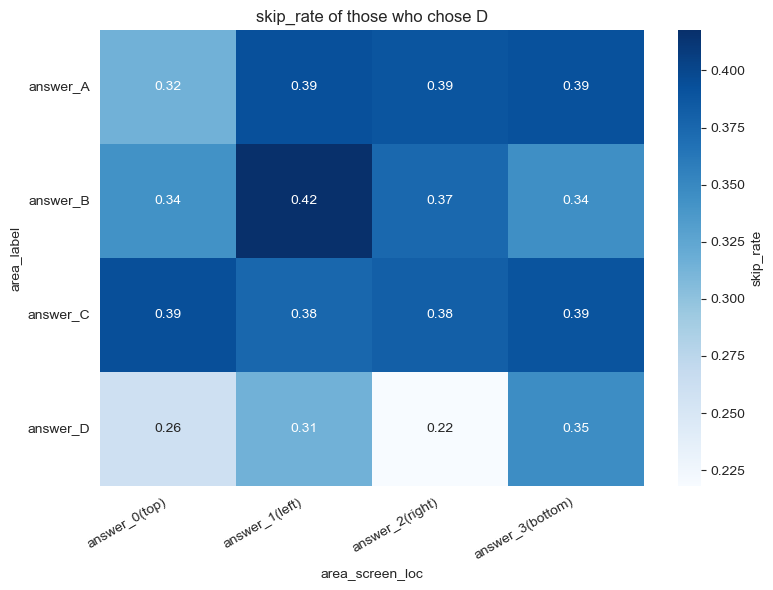


=== area_dwell_proportion: INCLUDING question area ===
HUNTERS (drop_questions=False)


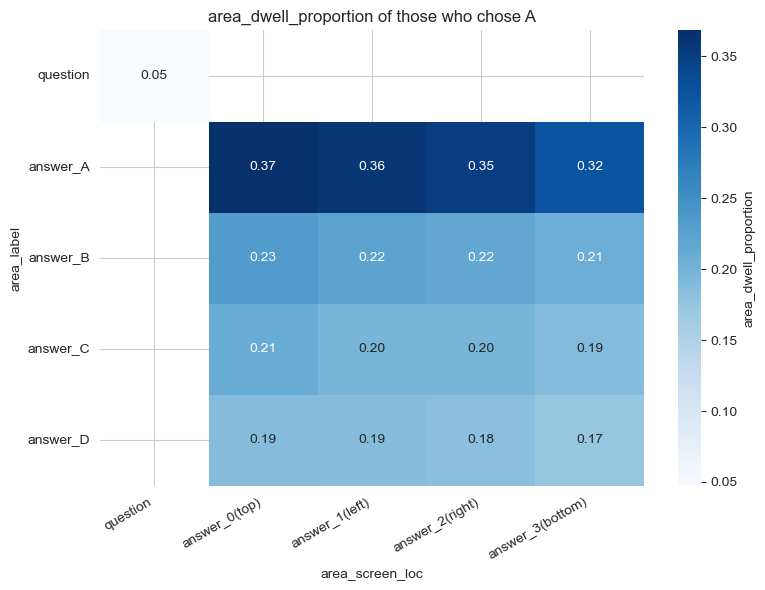

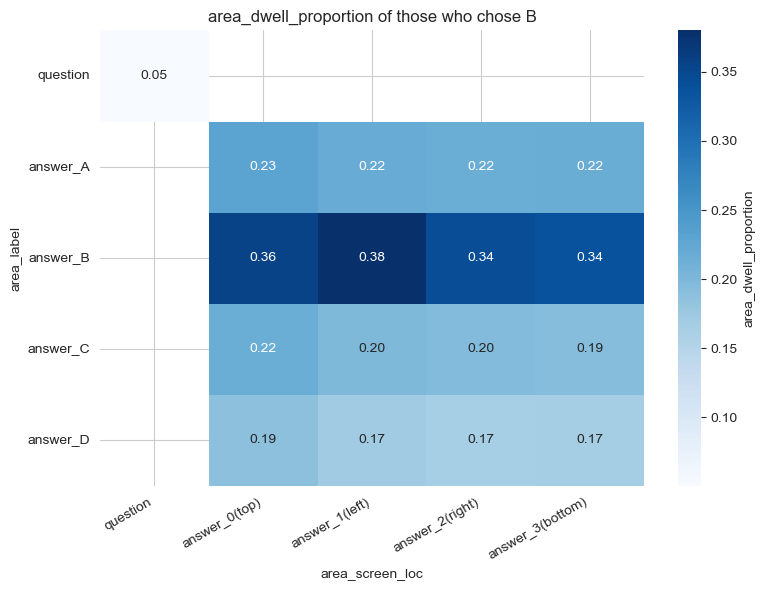

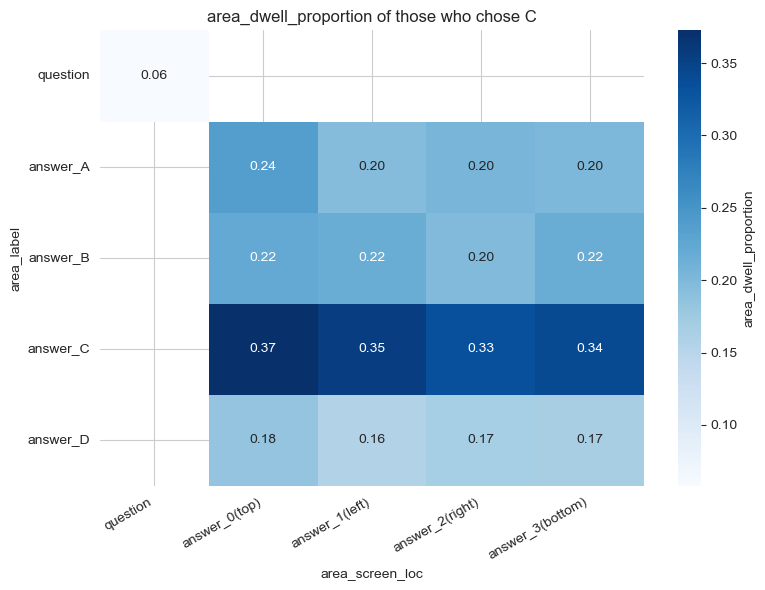

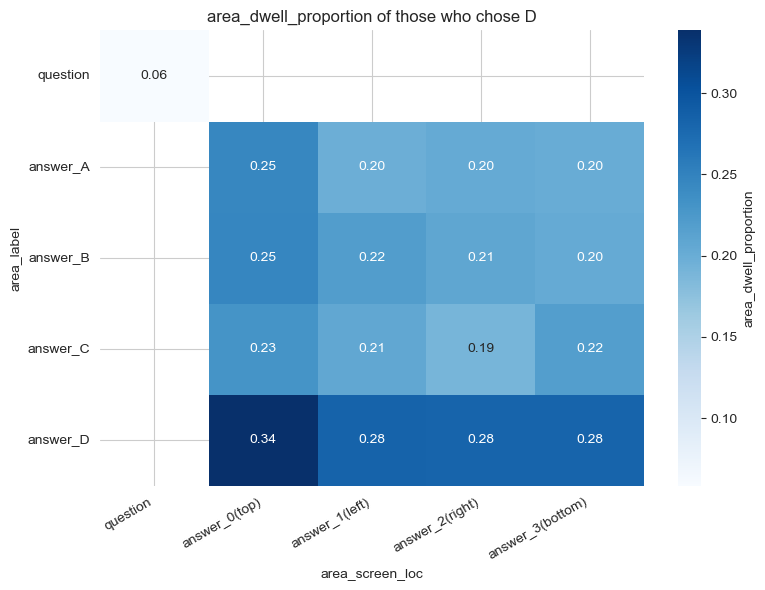

GATHERERS (drop_questions=False)


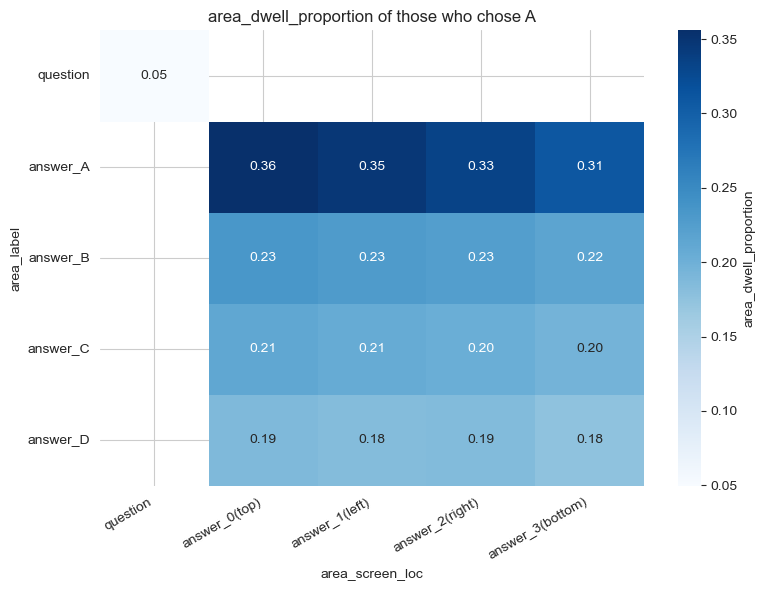

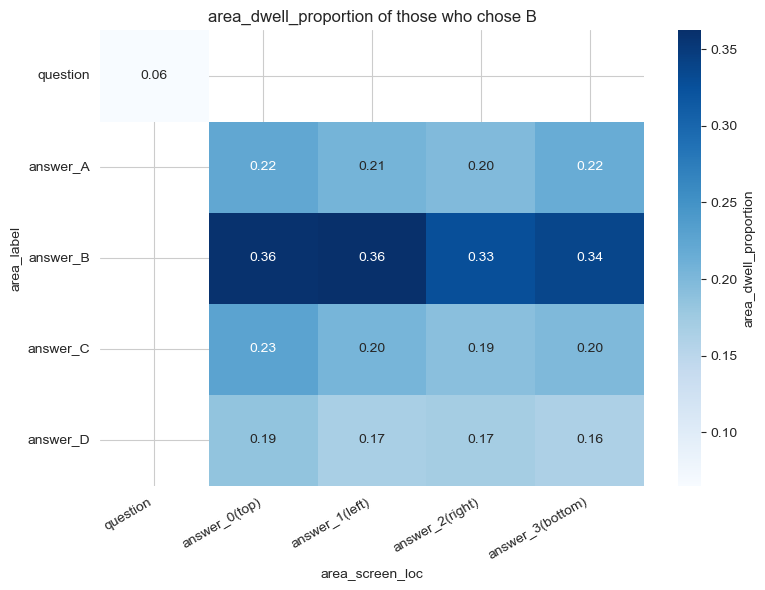

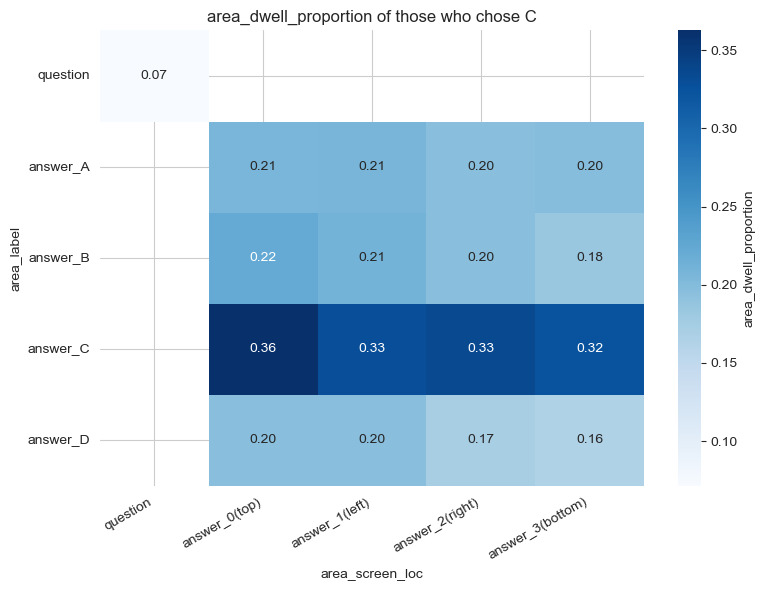

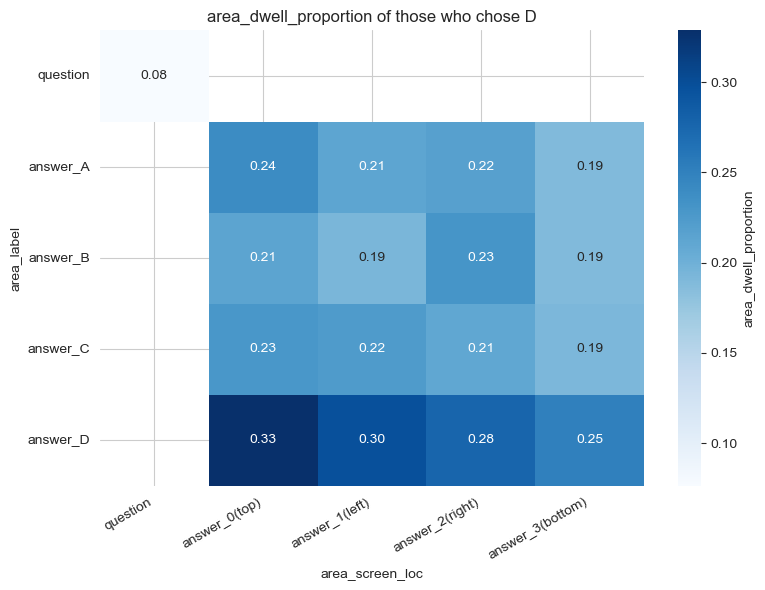


=== area_dwell_proportion: EXCLUDING question area ===
HUNTERS (drop_questions=True)


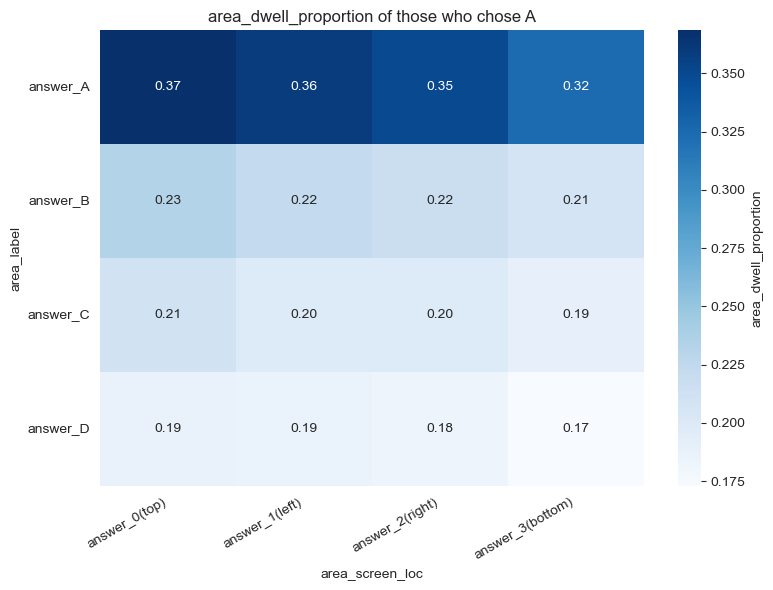

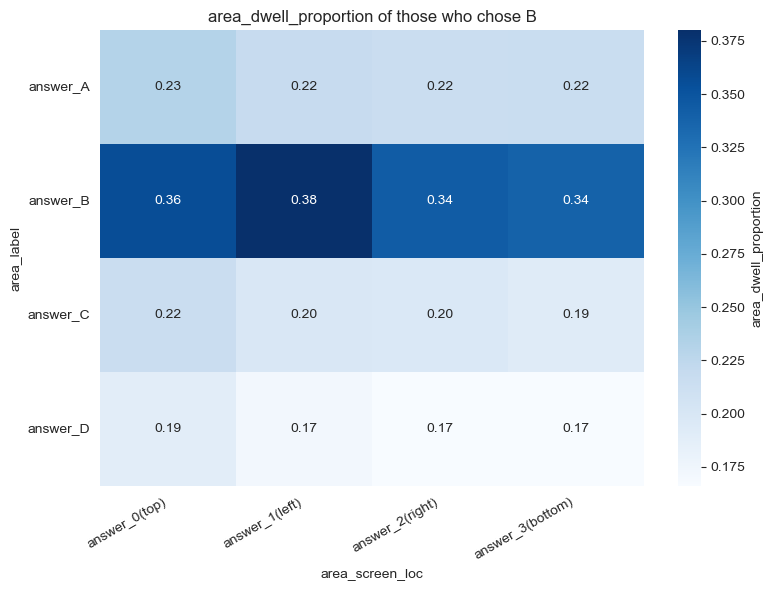

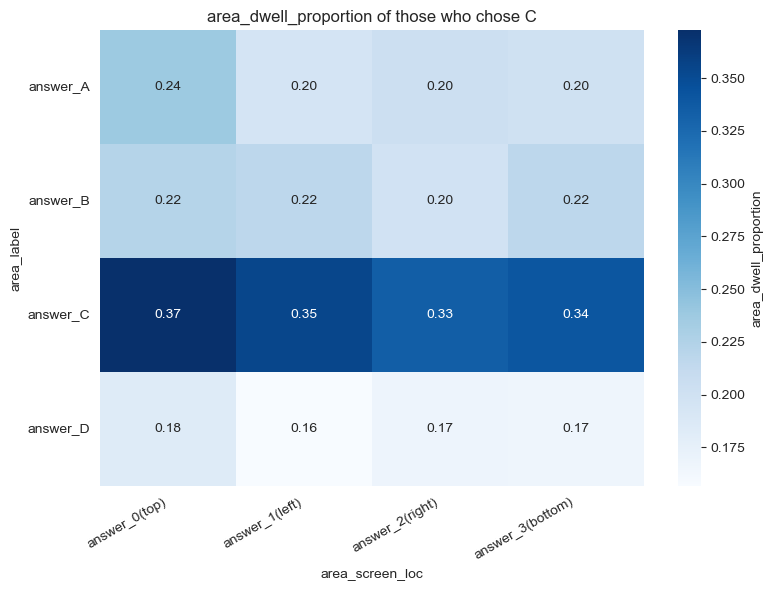

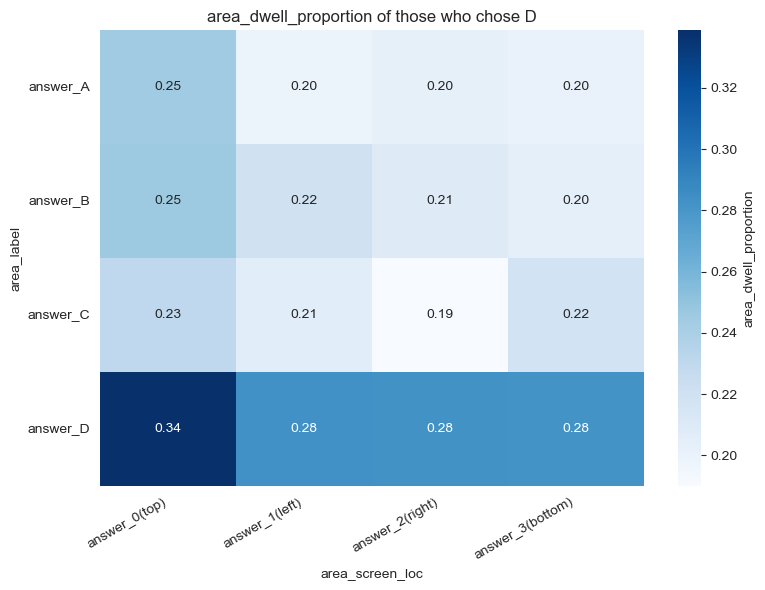

GATHERERS (drop_questions=True)


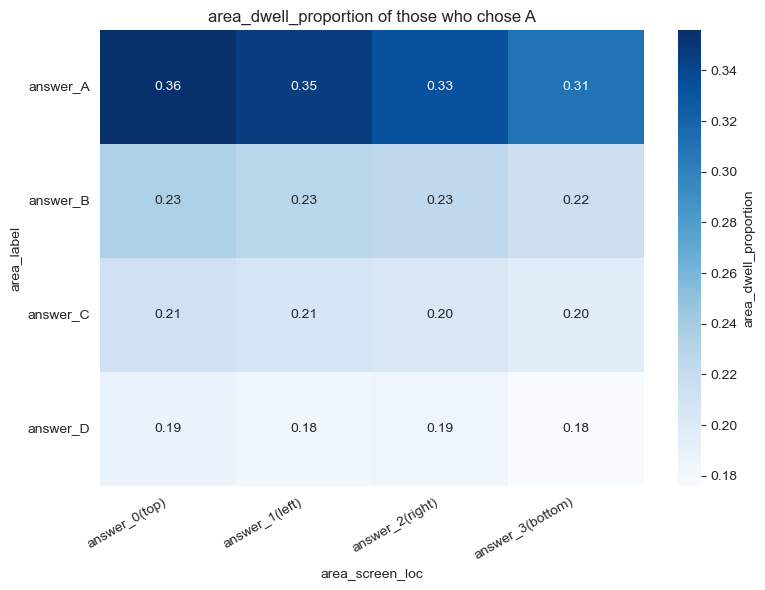

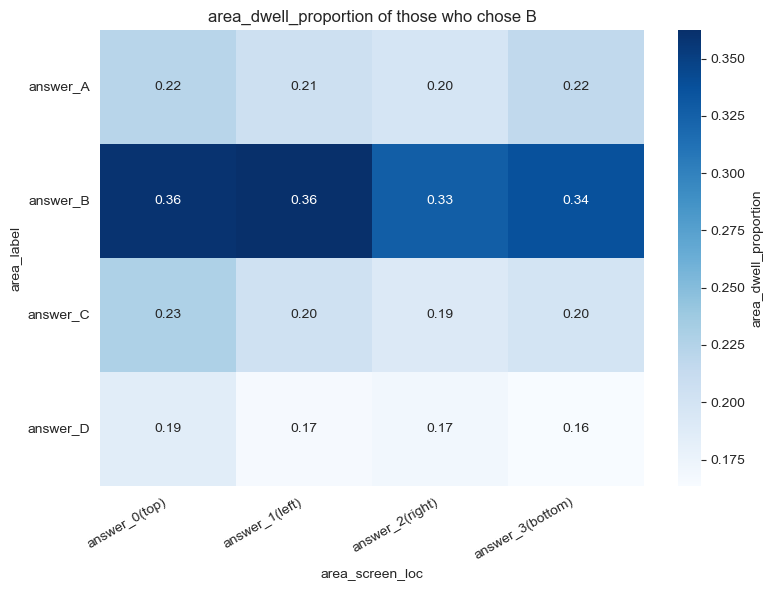

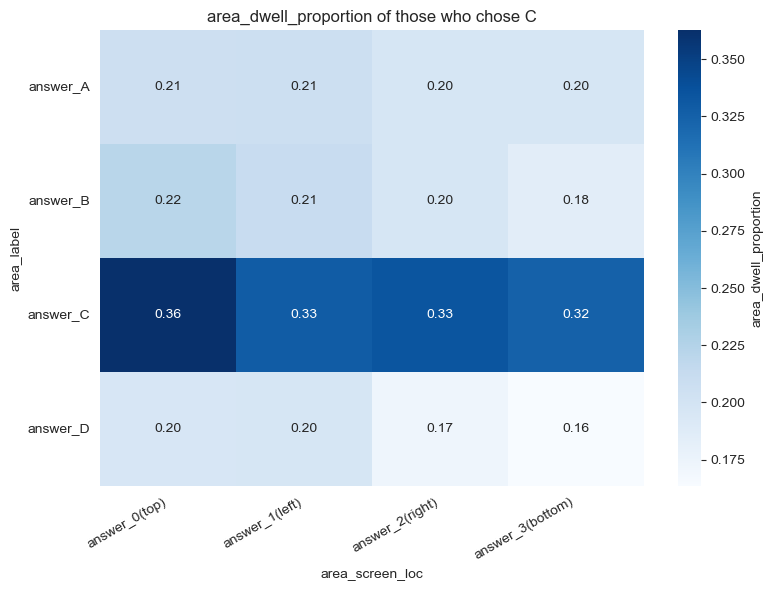

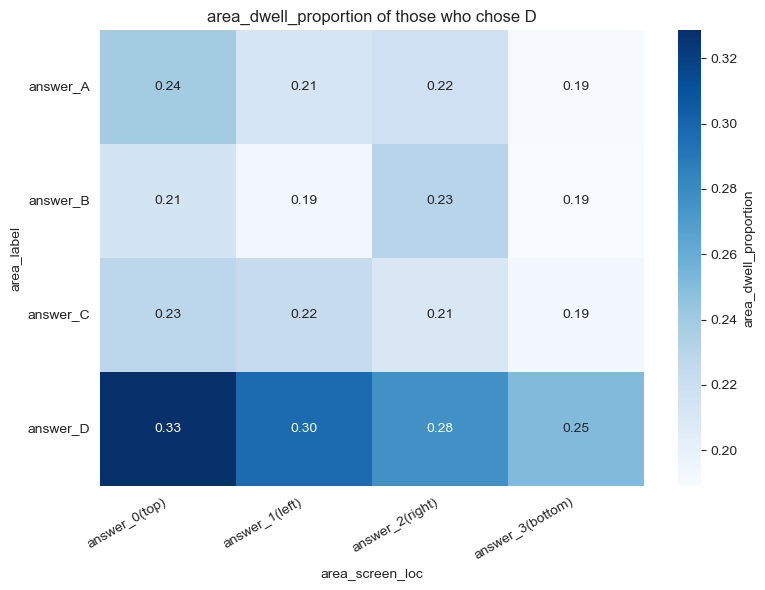

In [5]:
for metric in C.AREA_METRIC_COLUMNS:
    print(f"\n=== {metric}: INCLUDING question area ===")
    label_vs_loc_mat(metric, hunters, gatherers, drop_questions=False)

    print(f"\n=== {metric}: EXCLUDING question area ===")
    label_vs_loc_mat(metric, hunters, gatherers, drop_questions=True)
